# Flight Price Prediction
### Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

### FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

# Importing the libraries

In [31]:
! pip install sweetviz -q

In [89]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset

### We have loaded both "train" and "test" dataset

#### I have converted the excel files to CSV as it's much easy to for data manipulation

In [99]:

# Download the Excel file as it is

xls1 = pd.ExcelFile("D:\Train_set_flight.xlsx")
xls2 = pd.ExcelFile("D:\Test_set_flight.xlsx")

excel_sheet_1 = pd.read_excel(xls1)  # Excel sheet 1
excel_sheet_2 = pd.read_excel(xls2) # Excel sheet 2 

# Write the dataframe object
# into csv file

excel_sheet_1.to_csv ("Train_set_flight.csv", 
                  index = None,
                  header=True)

excel_sheet_2.to_csv ("Test_set_flight.csv", 
                  index = None,
                  header=True)
    
    
# read csv file and convert 
# into a dataframe object
df_train = pd.DataFrame(pd.read_csv("Train_set_flight.csv"))
df_test = pd.DataFrame(pd.read_csv("Test_set_flight.csv"))


# Further Preprocessing

## "df_train" is "Training Dataset"
## "df_test" is "Test Dataset"

In [100]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [101]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# Preporcessing


### The "Train Dataset" has 10683 rows and 11 columns that includes the target variable "Price"

### The "Test Dataset" has 2671 rows and 10 columns that does not include the target variable

In [10]:
print("Train Data:", df_train.shape)
print("Test Data:", df_test.shape)

Train Data: (10683, 11)
Test Data: (2671, 10)


# We will use "pandas profiling" to analyze "Train" and "Test" dataset


In [102]:
from pandas_profiling import ProfileReport

In [105]:
profile_train = ProfileReport(df_train, title="Pandas Profiling Report of Train Dataset", explorative=True)
profile_test = ProfileReport(df_test, title="Pandas Profiling Report of Test Dataset", explorative=True)

In [104]:
# run this line if you want to generate the report in Notebook itself

profile_train.to_widgets()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [106]:
profile_test.to_widgets()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# The stats for "Train Dataset"

### We can notice only "Price" is the numeric value and we are not applying anything on this a it's the target variable

In [11]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## From info we get to know that:

### In "Train Dataset", the columns "Route"  and "Total_Stops" has 1 missing values each.

In [12]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## From info we get to know that:

### In "Test Dataset", there is no missing data

In [13]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

### From the info fucntion, we know there are 10 object features and only 1 inte64 feature that is also the target varaibale.

### Since there is no target variable in test dataset, we are left with object variables only.

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


# Fill the missing values for both "Traning" and "Test" dataset

In [195]:
df_train["Route"].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
BOM → VNS → DEL → HYD       1
BOM → COK → MAA → HYD       1
CCU → RPR → HYD → BLR       1
BOM → GOI → HYD             1
Name: Route, Length: 128, dtype: int64

In [196]:
# Fill the columns with mode as its categorical data

df_train["Route"].fillna(df_train["Route"].value_counts().index[0], inplace=True)


In [197]:
df_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [198]:
# Fill the columns with mode as its categorical data

df_train["Total_Stops"].fillna(df_train["Total_Stops"].value_counts().index[0], inplace=True)

# Let's check if we still have Null values

### Null values have been removed, for both features in "Train" and  we never had any missing values in "Test" dataset

In [199]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Let's check the same output using a Heatmap for both "Train" and "Test" dataset

<AxesSubplot:>

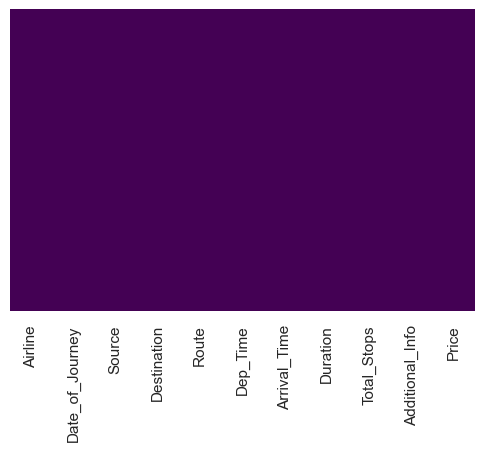

In [200]:
# train data set

sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

<AxesSubplot:>

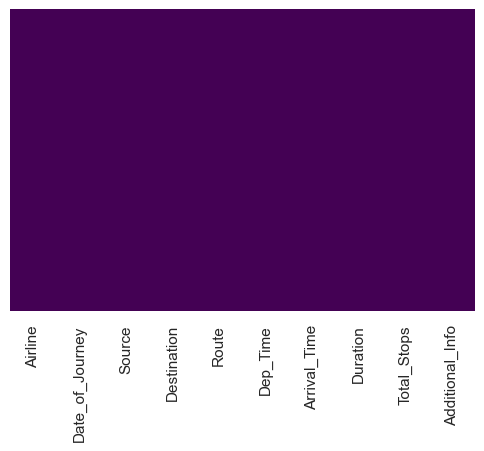

In [201]:
# test data set

sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap="viridis")

#### From the below plot with respect to training dataset, we can see that Jet Airways holds a large share of business in this sector with about 36.02 % followed by IndiGo and Air India.

#### However this data is valid only for months between March and June of 2019 as tucket booking is highly dynamic and various factors influence in increase or diminish sales factors.

In [112]:
airline_percent = (df_train["Airline"].value_counts()/df_train.shape[0])*100
print(airline_percent)

Jet Airways                          36.029205
IndiGo                               19.217448
Air India                            16.399888
Multiple carriers                    11.195357
SpiceJet                              7.657025
Vistara                               4.483759
Air Asia                              2.986053
GoAir                                 1.815969
Multiple carriers Premium economy     0.121689
Jet Airways Business                  0.056164
Vistara Premium economy               0.028082
Trujet                                0.009361
Name: Airline, dtype: float64


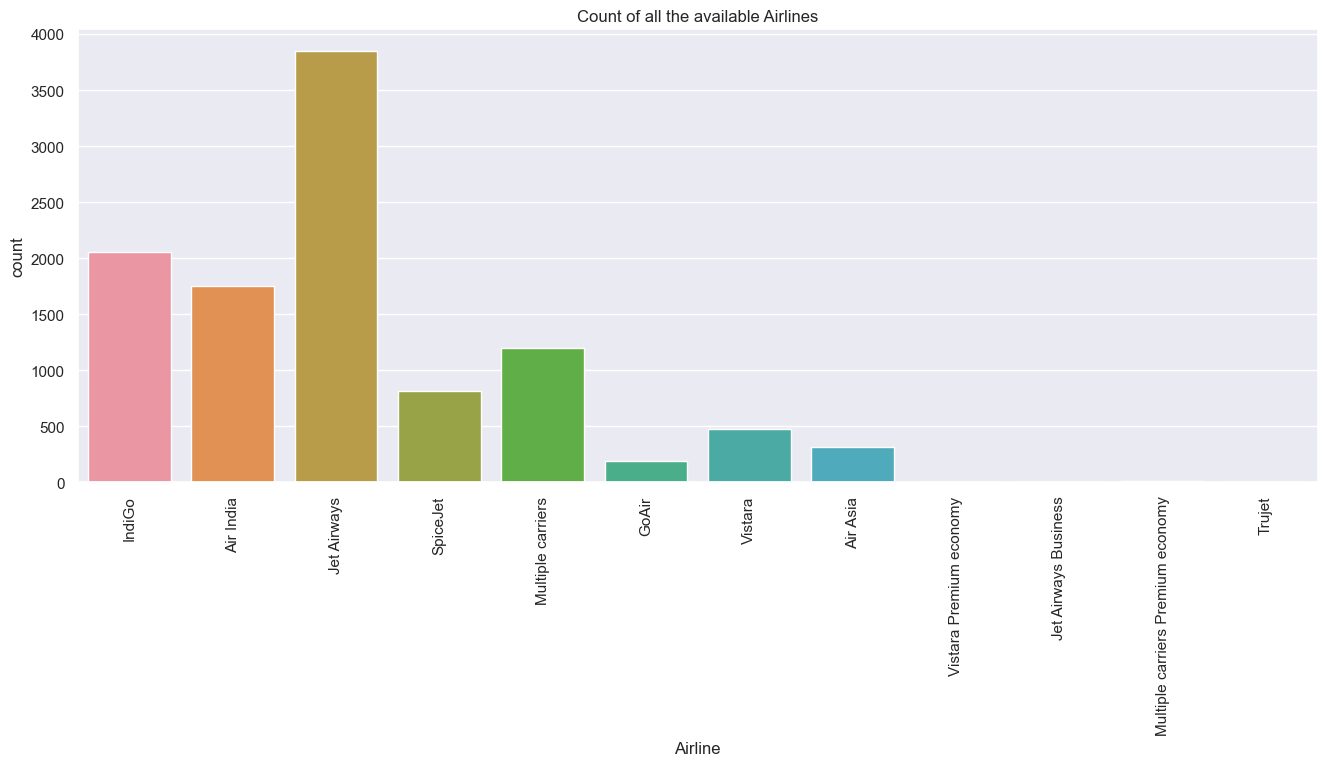

In [113]:

plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot("Airline", data=df_train).set(title='Count of all the available Airlines') 
plt.xticks(rotation=90)
plt.show()

#### Let's see the source or starting point of airlines

#### We can see that majority of flights seemed to have originated from Delhi more than other cities in the year 2019.

#### Delhi being the capital city of India, has one of the largest Airports and compared to other ctites it has more number of flight connectivitie.

#### We can also observe that a lot of people from Haryana, Chattisgarh generally travel to and from Delhi as they are quite nearby and also a lot of delegates may be travelling to the capital state, hence we can see a lot of flights halt at Delhi

#### We can see Kolkata has second highest flights followed by Bangalore, both having busiest airports just like Delhi

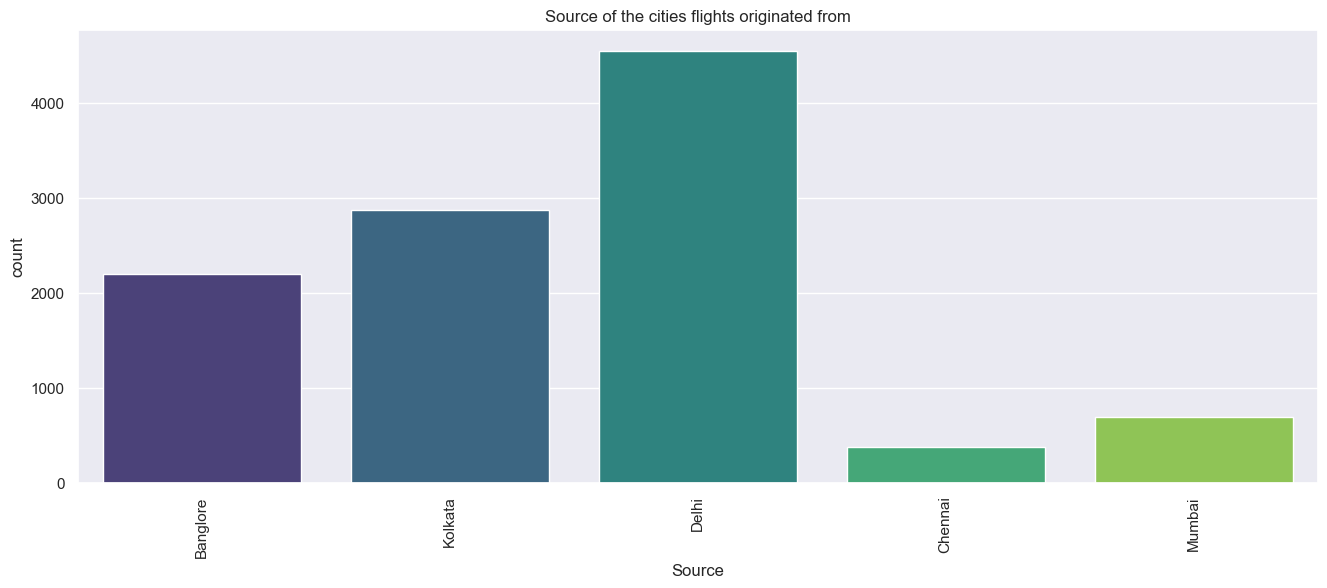

In [129]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot("Source", data=df_train, palette= "viridis").set(title='Source of the cities flights originated from') 
plt.xticks(rotation=90)
plt.show()

#### From the below plot we can see the prices across various cities and Delhi seems to be ranking at the top followed by Kolkata and then by Bangalore.

#### The more number of flights are available, more number of passengers can travel hence more amount would be spent.

#### This data cannot be entirely true for the present year as this occured back in 2019 and prices tend to change according to various factors.

#### Mumbai seems to have less travel back in 2019. Mumbai is a very much crowded city and this city also has a lot of people who travel to and forth but it seems during this time, travel was very less than usual.

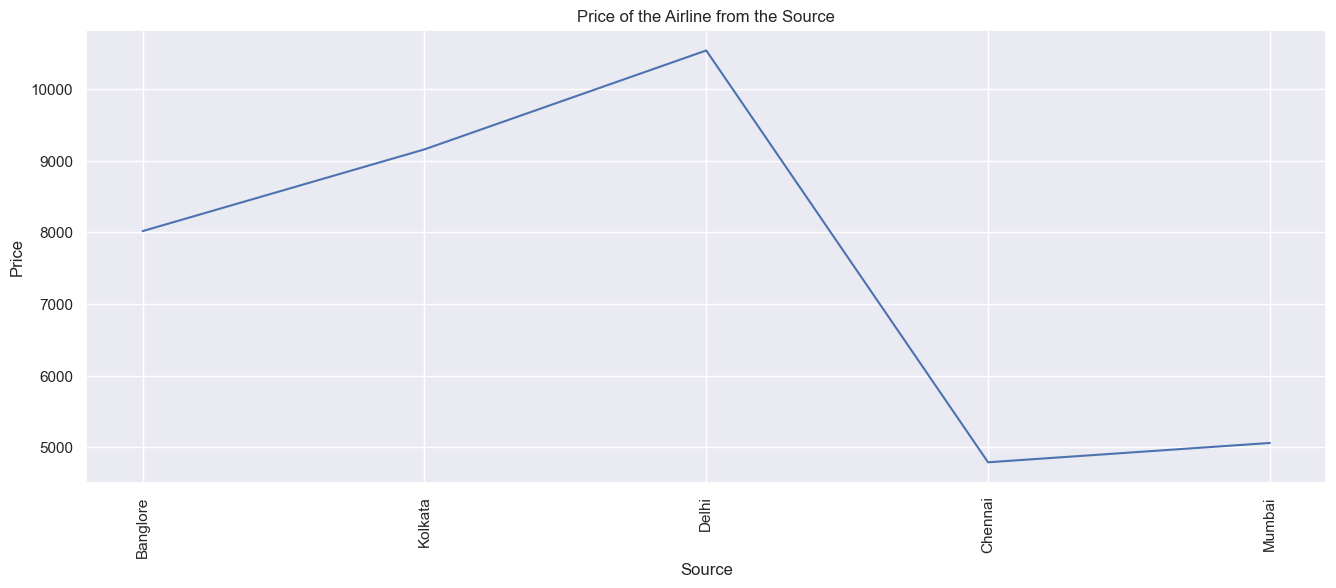

In [190]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df_train, x="Source", y="Price", ci=None).set(title='Price of the Airline from the Source')
plt.xticks(rotation=90)
plt.show()

#### We can see from the below plot that people majorly travel to "Cochin" followed by "Bangalore" and "Delhi".

#### Cochin has gained a wide range of attention when it comes to business in Kerala. It is known to have a lot of flexible tax and business related benefits for companies and a lotof domestic and foreign investors have shows huge interest in this city.

#### This could be the reason for major flights that land there. 

#### Bangalore is the IT hub of India and has a lot of startups and MNCs. Hence people keep travelling and this could be the reason for being the seconf highest destination where flights go to.

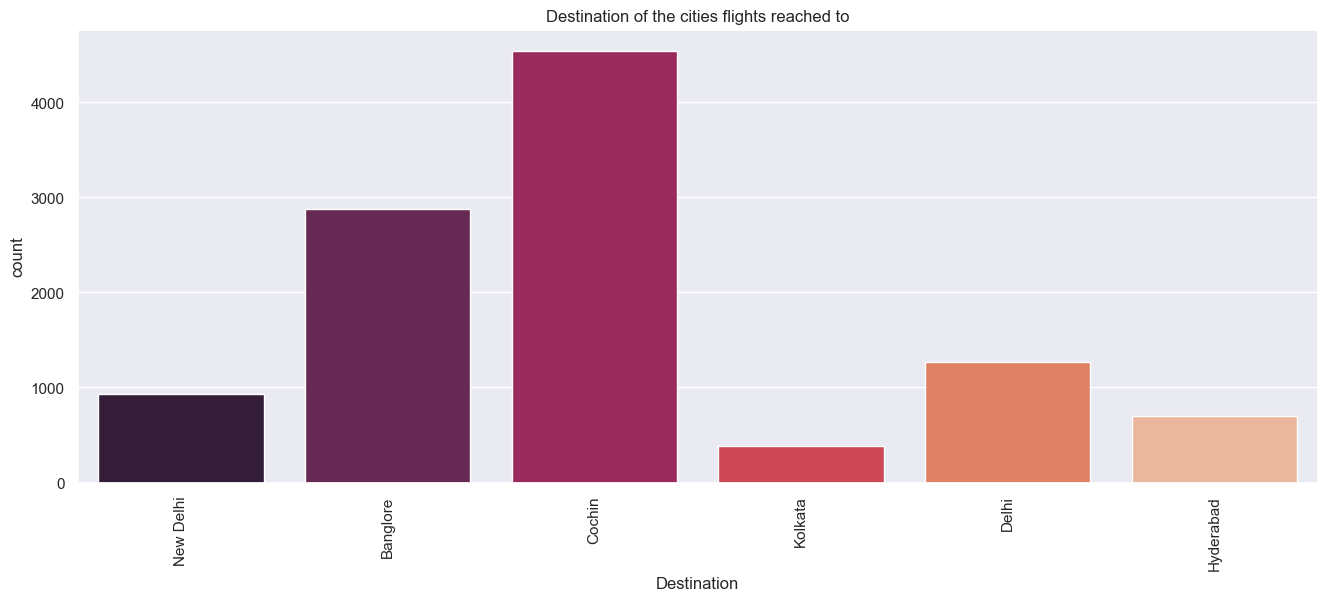

In [131]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot("Destination", data=df_train, palette= "rocket").set(title='Destination of the cities flights reached to') 
plt.xticks(rotation=90)
plt.show()

#### We can see from the below plot the airline prices for all the companies

#### It appears Jet Airways Busiess was the highest to charge as it's way high compared to majority of the airline companies.

#### Where majority of flights charge roughly 10,000 to 11,000 Rs for ticket, but Jet Airways Business charges more than 55,000 Rs.

#### It is underatandable as regular or economy have less price and business offer high. Also this could be the reason why Jet Airways as a whole went Bankrupt in late 2019.


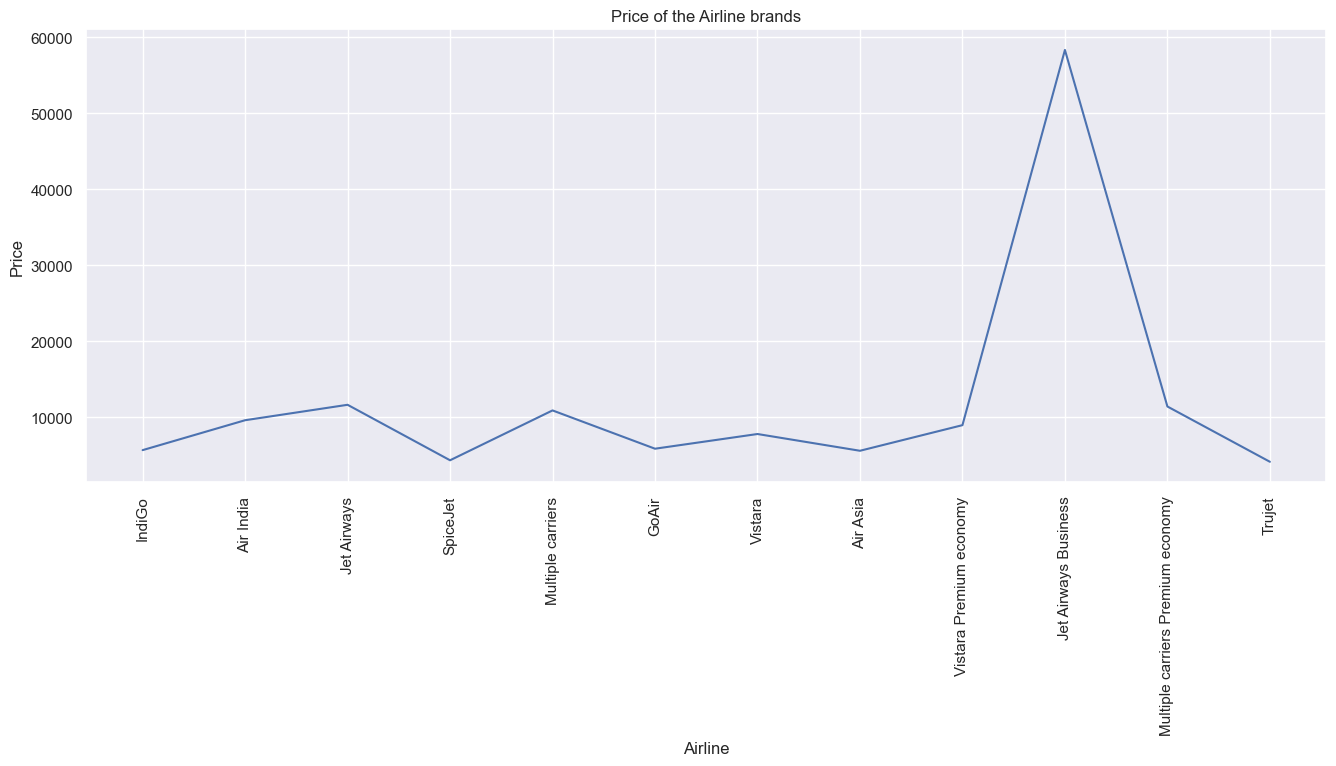

In [191]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df_train, x="Airline", y="Price", ci=None).set(title='Price of the Airline brands')
plt.xticks(rotation=90)
plt.show()

#### From the below plot we can see that "Business Class" has a lot of additional benefits. 

#### It is obvious that business class offers many benefits like food, drinks, other amenities even if the travel duration is for 30 mins.

#### Sometimes passengers tend to feel we get items for free but we may have already paid either through ticket or through service charges.

#### An Economy class doesn't have such benefits and hence people prefer this more as it's relatively cheaper that other class.

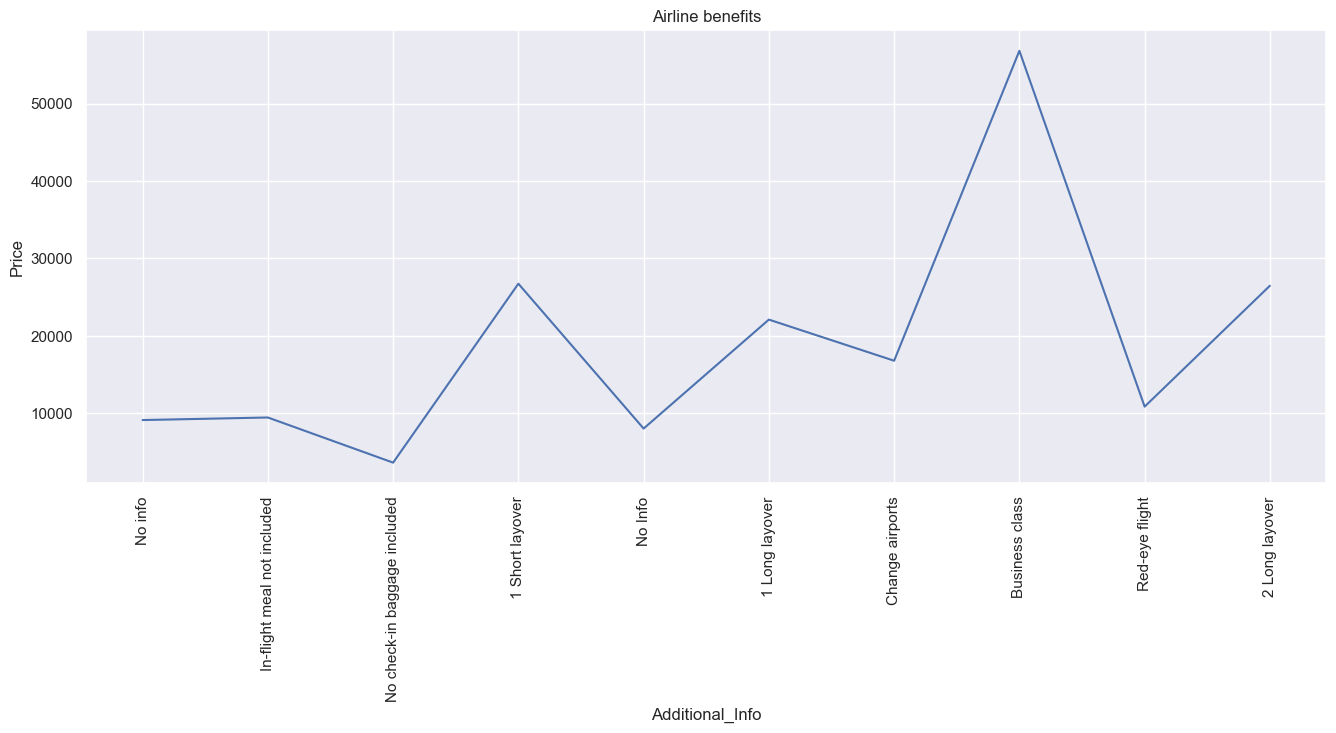

In [192]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df_train, x="Additional_Info", y="Price", ci=None).set(title='Airline benefits')
plt.xticks(rotation=90)
plt.show()

#### The below plot shows us the number of stops given by flights

#### We can see majority of flights have "one stop" and this shows that flights have reached directly to the destination with more amout of time for halt.

#### This also tells us that for domestic travel passengers do not prefer connecting flights as it's time consuming. 

#### However we can also see that people have opted for "non-stop" flights. These are as same as "one-stop" but here there is essentially no stop at all. Flight may take time to refuel and that's it.

#### This is common for all economy flights or airlines that have cheap tickets beacuse stopping at an airport means the airline company ahs to pay parking fees that could be huge even if it means staying only for sometime.

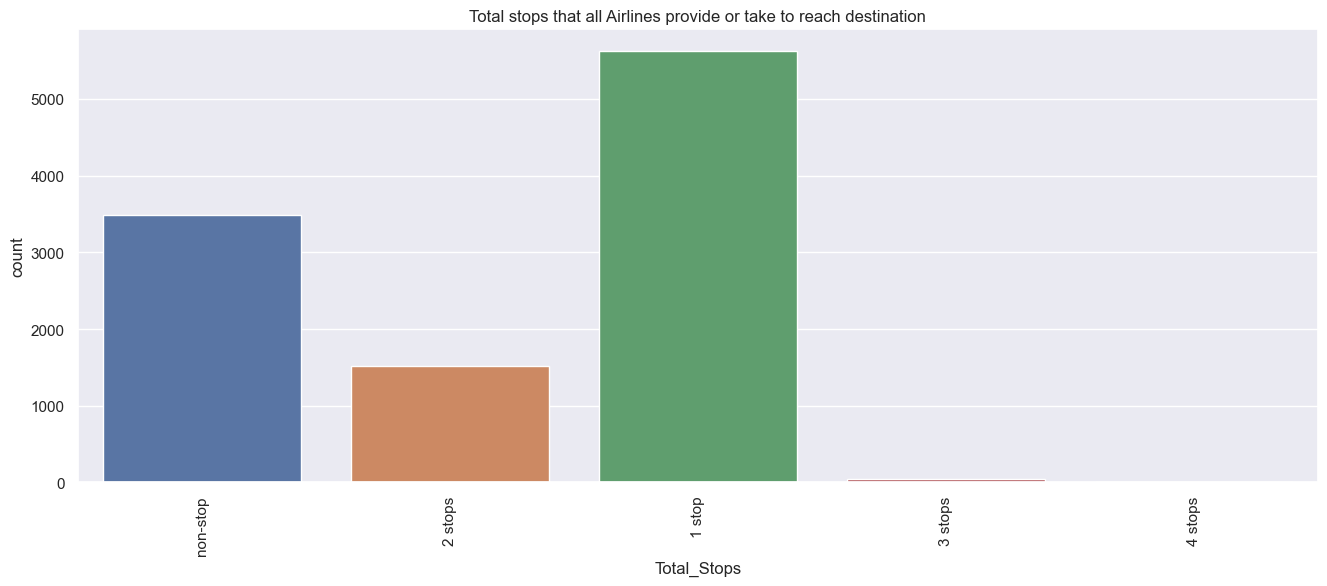

In [188]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot("Total_Stops", data=df_train).set(title='Total stops that all Airlines provide or take to reach destination') 
plt.xticks(rotation=90)
plt.show()

#### From the below plot we can see the price distribution across the number of stops.

#### We can clearly see that flights with "one- stop" have more prices compared to other modes of halt. This makes sense as you go directly and reach faster.

#### If we opt for "two-stops" when end up going to cities even if we do not want to as it's part ofout travel and we end up spending more time. hence less price could be a way of compensating that situation. 

#### Prices could be less when people do not prefer that mode and it serves as a means to attract customers.

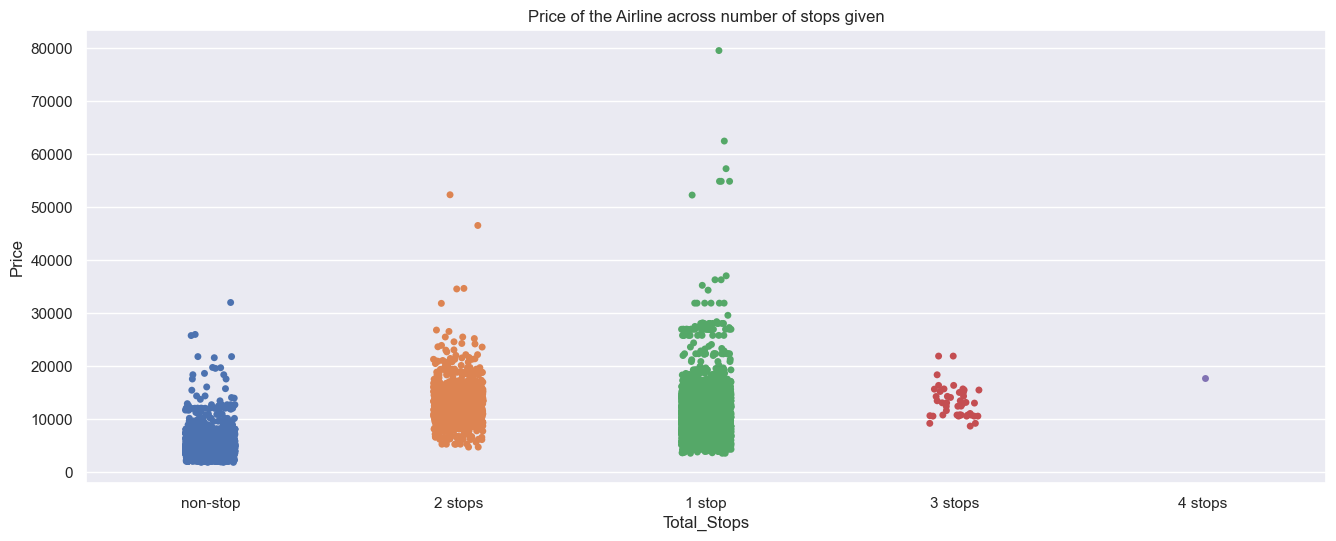

In [173]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.stripplot(x="Total_Stops", y="Price", data=df_train).set(title='Price of the Airline across number of stops given')
plt.show()

#### From the below plot we can observe that the dates, 6th, 5th and 3rd had highest inflow of flight travel compared to other days.

#### This data however cannot be completely reliable as it's not necessary that the same is applied across all the dates or same dates in other months.

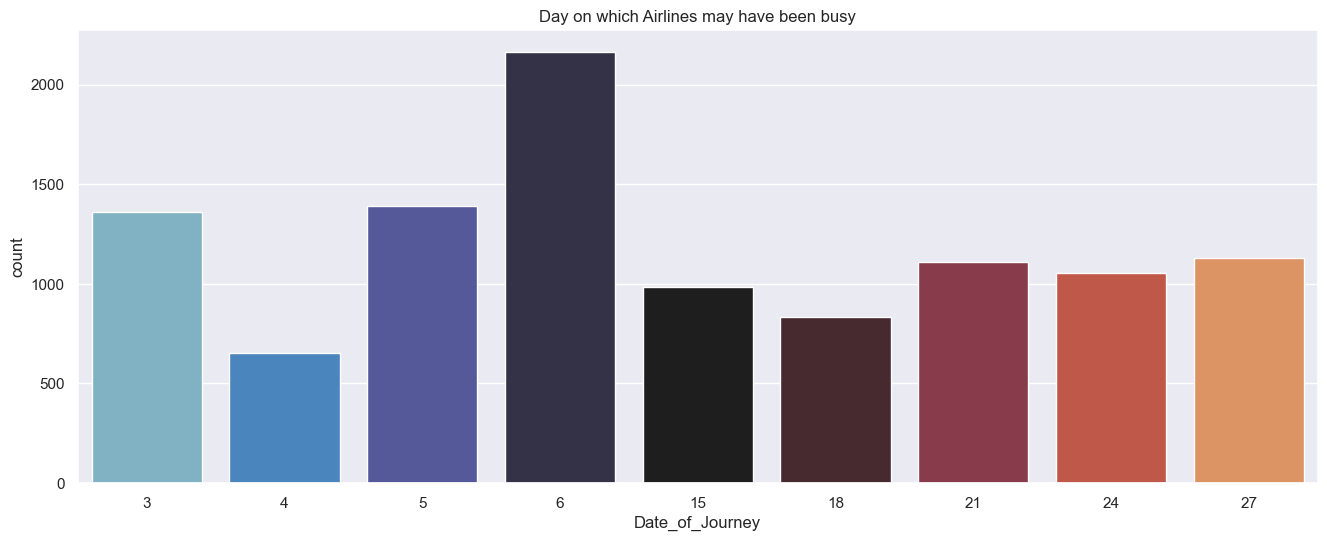

In [193]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x=pd.DatetimeIndex(df_train['Date_of_Journey']).day,
                   data=df_train, palette= "icefire").set(title='Day on which Airlines may have been busy') 
plt.show()

#### From the below plot we get to observe that in 2019, month June had the highest number of flight travel followed by March and then May.

#### But the dataset claimed to have data only for months between March and June. This dataset may have included all the important months as not all months are displayed and only specif months are to be seen.

#### It's not possible that Airline did not make any business in missing months. Hence the dataset doesn't have all the month's data of 2019.

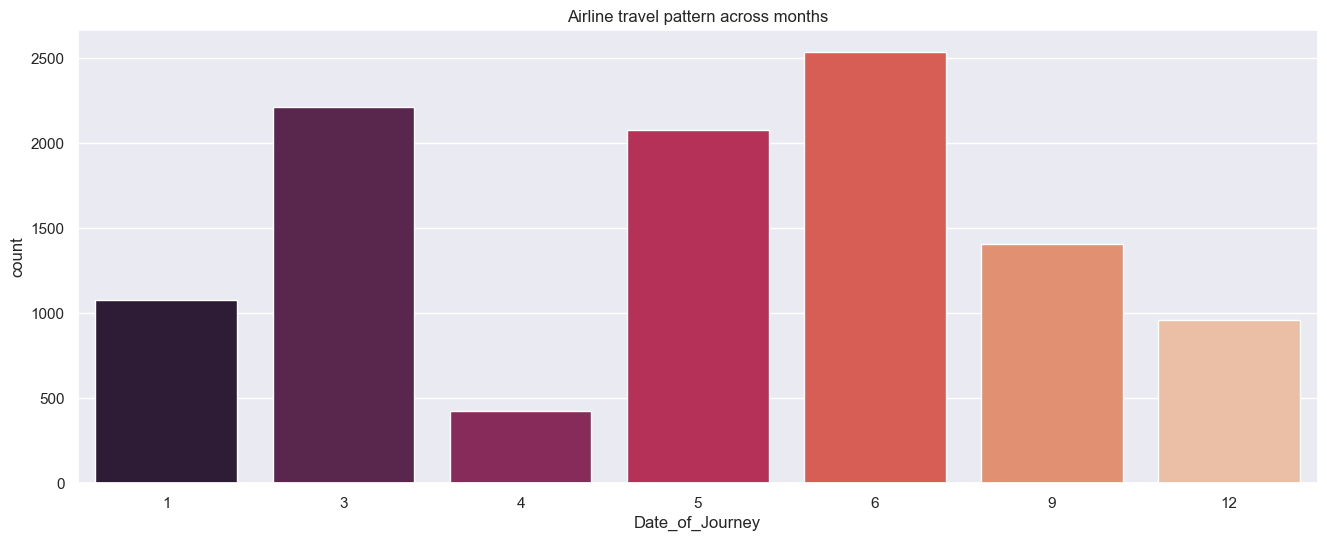

In [194]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x=pd.DatetimeIndex(df_train['Date_of_Journey']).month,
                   data=df_train, palette= "rocket").set(title='Airline travel pattern across months') 
plt.show()

#### From the below plot we can observe that January and February months of 2019 hd highest price tickets. 

#### We understand a lot of passengers travelled in March hence the prices may have been high and January that was traveled least may have high prices due to peak seasons.

#### The remainig months May, June, September and December have consistent prices with minimal or no changes.

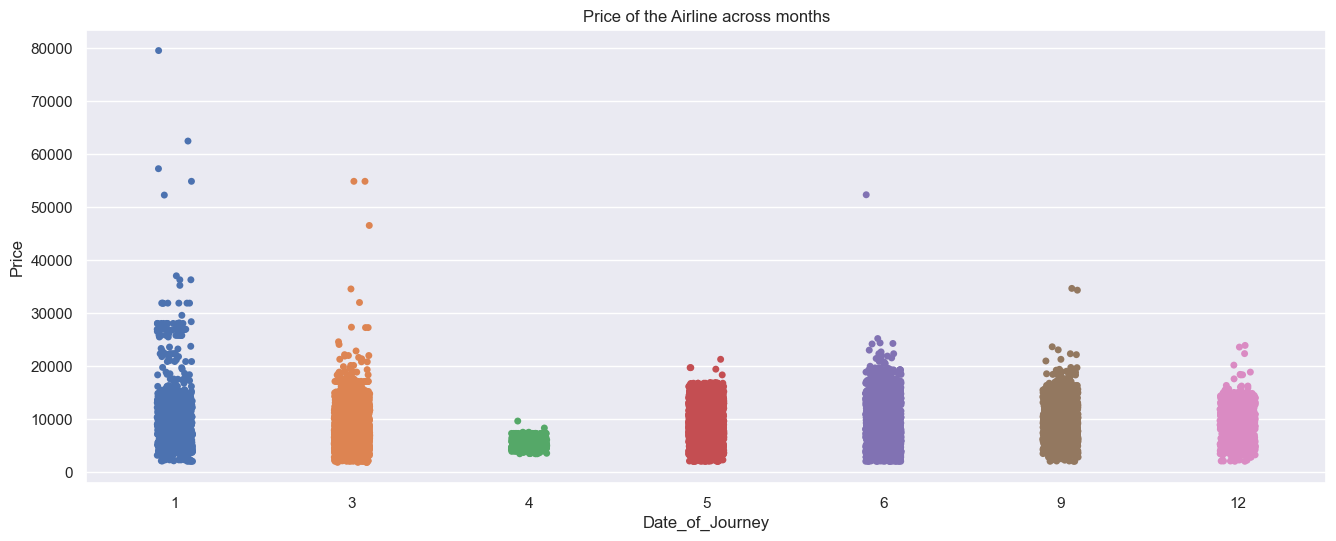

In [172]:


plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.stripplot(x=pd.DatetimeIndex(df_train['Date_of_Journey']).month, 
                   y="Price", data=df_train).set(title='Price of the Airline across months')
plt.show()

#### Displaying the total columns names to select features for encoding

In [202]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# Encoding the dataset

### I have used LabelEncoder to encode the columns "Item_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type" and "Outlet_Type"

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Encode the training dataset

df_train.Airline = encoder.fit_transform(df_train.Airline)
df_train.Date_of_Journey = encoder.fit_transform(df_train.Date_of_Journey)
df_train.Source = encoder.fit_transform(df_train.Source)
df_train.Destination = encoder.fit_transform(df_train.Destination)
df_train.Route = encoder.fit_transform(df_train.Route)
df_train.Dep_Time = encoder.fit_transform(df_train.Dep_Time)
df_train.Arrival_Time = encoder.fit_transform(df_train.Arrival_Time)
df_train.Duration = encoder.fit_transform(df_train.Duration)
df_train.Total_Stops = encoder.fit_transform(df_train.Total_Stops)
df_train.Additional_Info = encoder.fit_transform(df_train.Additional_Info)

# Encode the test dataset

df_test.Airline = encoder.fit_transform(df_test.Airline)
df_test.Date_of_Journey = encoder.fit_transform(df_test.Date_of_Journey)
df_test.Source = encoder.fit_transform(df_test.Source)
df_test.Destination = encoder.fit_transform(df_test.Destination)
df_test.Route = encoder.fit_transform(df_test.Route)
df_test.Dep_Time = encoder.fit_transform(df_test.Dep_Time)
df_test.Arrival_Time = encoder.fit_transform(df_test.Arrival_Time)
df_test.Duration = encoder.fit_transform(df_test.Duration)
df_test.Total_Stops = encoder.fit_transform(df_test.Total_Stops)
df_test.Additional_Info = encoder.fit_transform(df_test.Additional_Info)


# Datasets have now been encoded

In [25]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,4,8,3897
1,1,6,3,0,84,31,906,336,1,8,7662
2,4,43,2,1,118,70,413,106,1,8,13882
3,3,10,3,0,91,164,1324,311,0,8,6218
4,3,0,0,5,29,149,1237,303,0,8,13302


In [26]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,1,76,138,150,10,0,5
1,3,10,3,0,65,31,353,248,0,5
2,4,22,2,1,76,156,566,148,0,3
3,6,22,2,1,76,48,633,36,0,5
4,0,27,0,2,16,198,135,216,4,5


# Let's now observe the stats of the dataset

### All the values are accounted for and has no missing values

#### Difference between mean and std also seems fine .

In [27]:
df_train.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,23.735093,1.952261,1.436113,74.822896,107.980717,869.828419,194.069269,1.458111,7.393054,9087.064121
std,2.352155,12.337763,1.177221,1.474782,36.728405,61.085563,331.509504,108.620556,1.806290,1.214211,4611.359167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,48.000000,55.000000,603.000000,106.000000,0.000000,8.000000,5277.000000
50%,4.000000,24.000000,2.000000,1.000000,73.000000,96.000000,937.000000,233.000000,0.000000,8.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,104.000000,164.000000,1141.000000,280.000000,4.000000,8.000000,12373.000000
max,11.000000,43.000000,4.000000,5.000000,127.000000,221.000000,1342.000000,367.000000,4.000000,9.000000,79512.000000


In [28]:
df_test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,3.972669,23.662673,1.961438,1.432797,54.356421,96.249719,435.586672,169.453014,1.422688,4.634594
std,2.295657,12.536017,1.184328,1.467971,27.128993,54.620936,193.250349,93.907162,1.795728,0.760781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,14.000000,2.000000,0.000000,33.000000,48.000000,276.000000,91.000000,0.000000,5.000000
50%,4.000000,24.000000,2.000000,1.000000,51.000000,88.000000,481.000000,209.000000,0.000000,5.000000
75%,6.000000,35.000000,3.000000,2.000000,76.000000,146.000000,600.000000,241.000000,4.000000,5.000000
max,10.000000,43.000000,4.000000,5.000000,99.000000,198.000000,703.000000,319.000000,4.000000,5.000000


# Distribution of all the columns in the dataset


### All the features are categorical hence there is no pointvin looking at distribution. The only numerical feature we have is "Price" which is the target variable and we make no changes to that

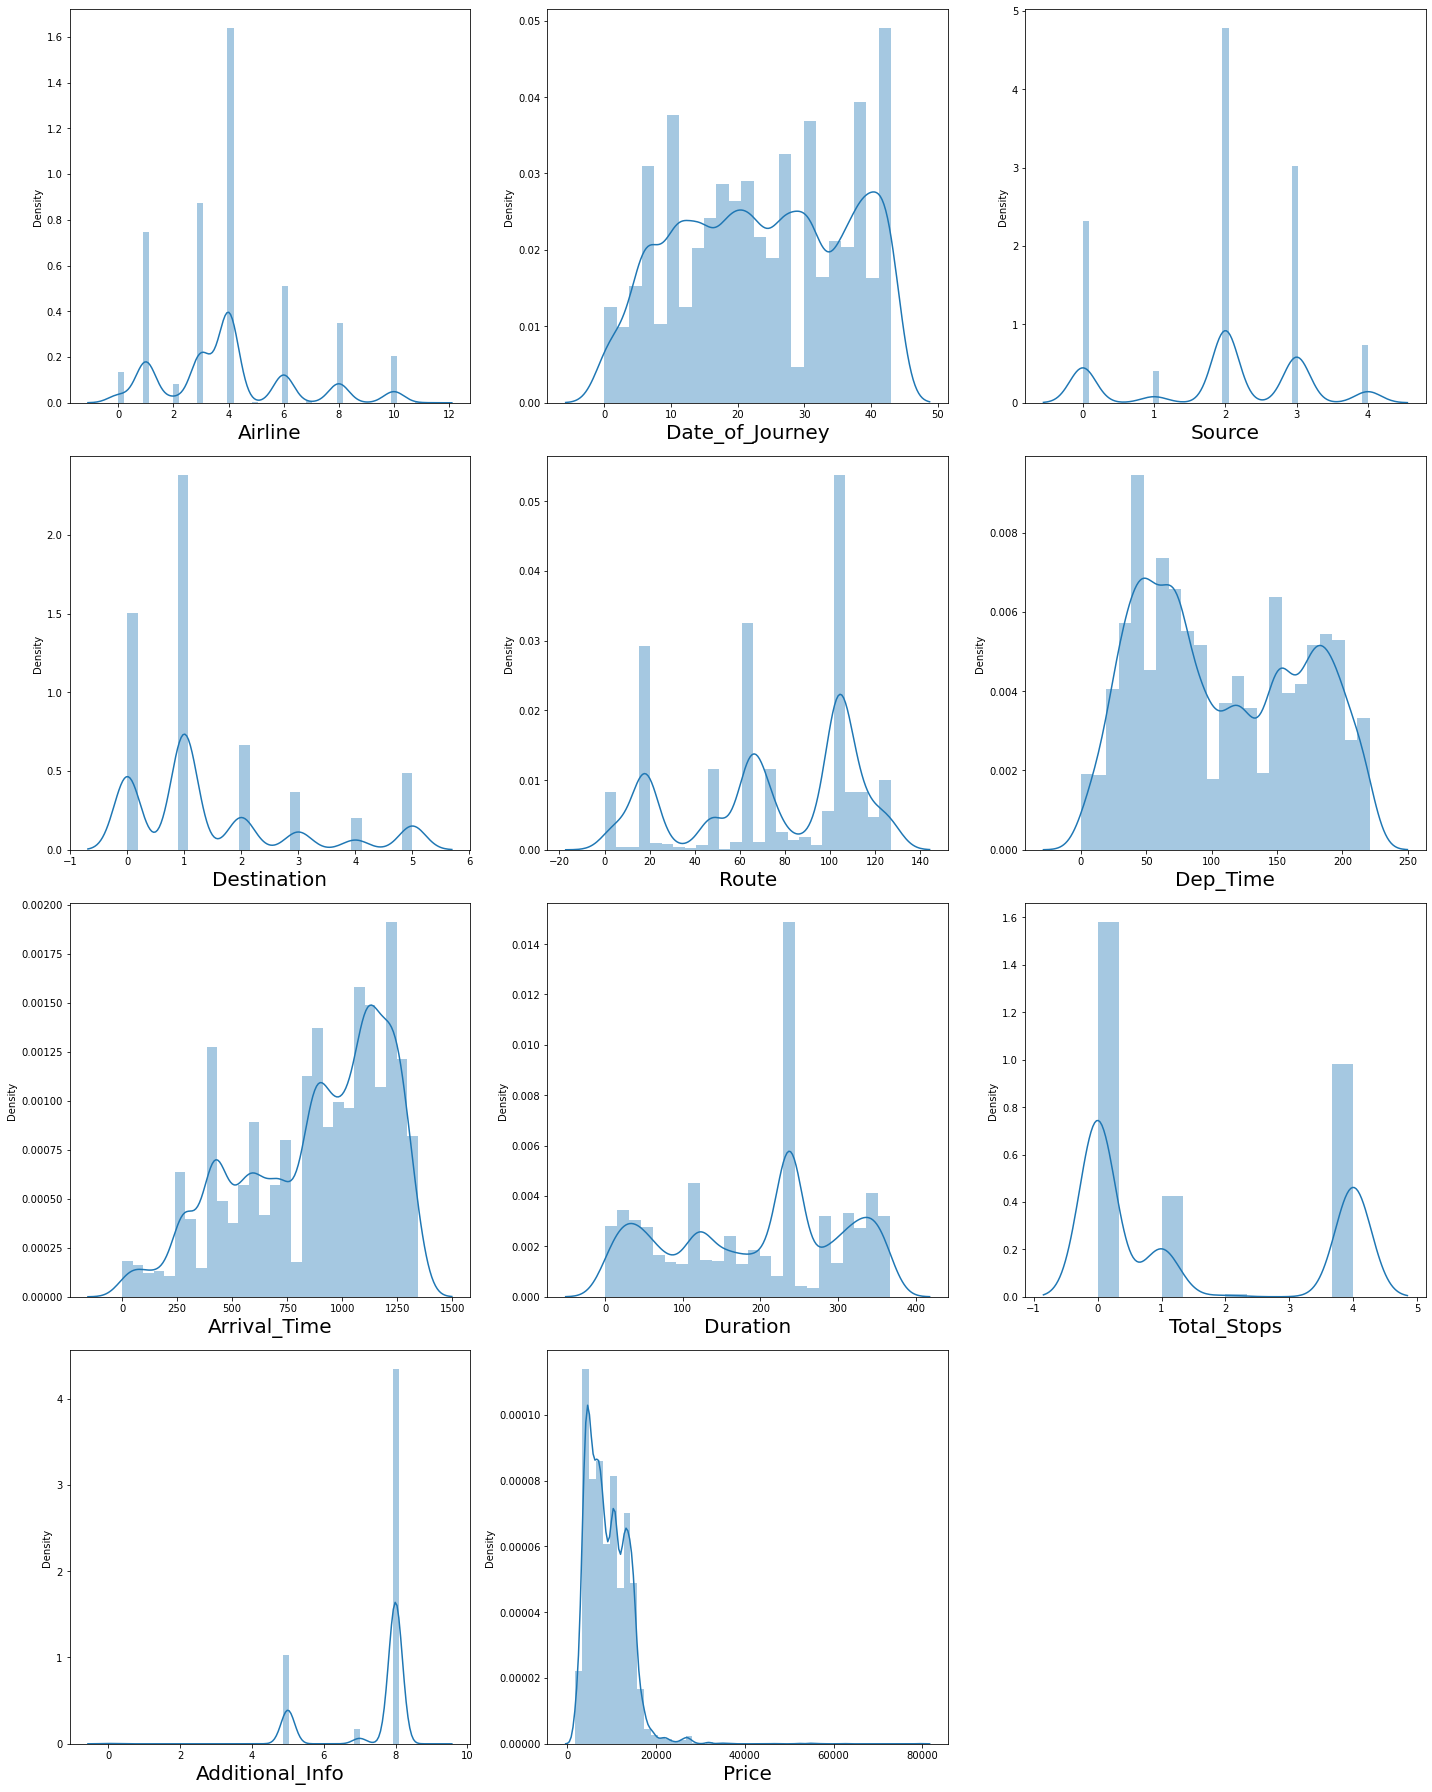

In [30]:
# let us now see the distribution of the "Train dataset"

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df_train:
    if plotnumber <=11:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df_train[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

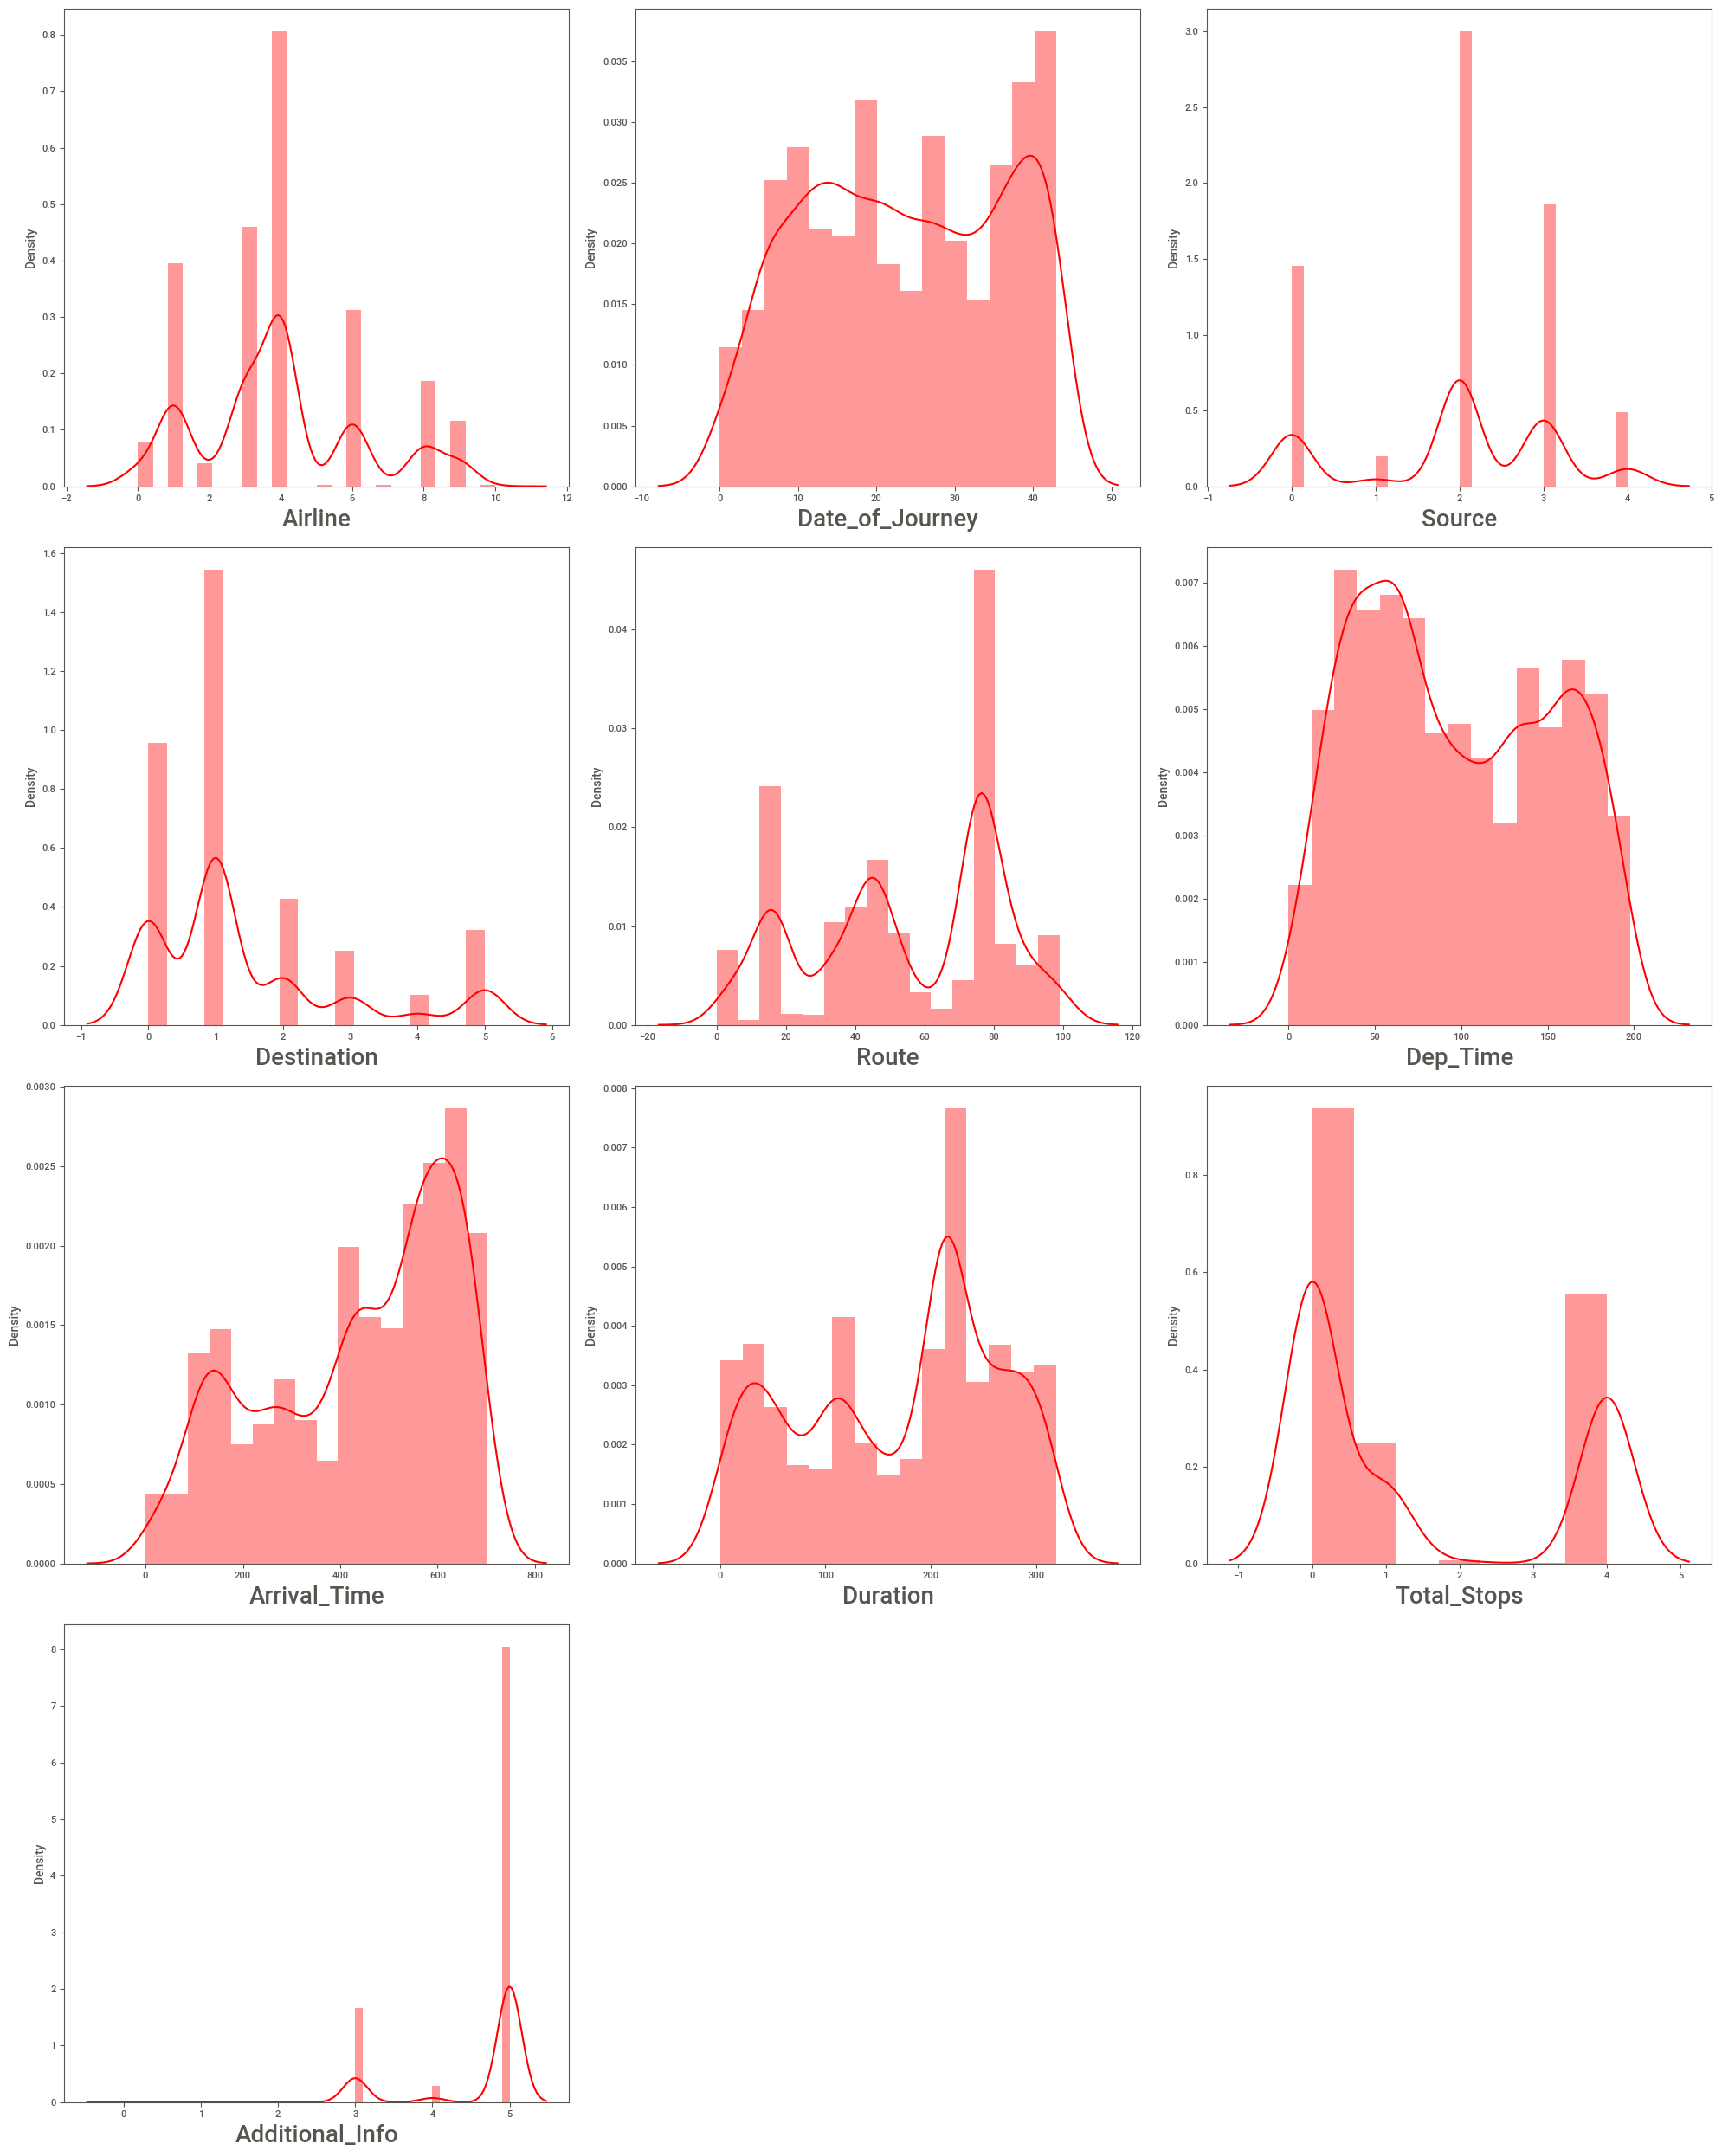

In [36]:
# let us now see the distribution of the "Test dataset"

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df_test:
    if plotnumber <=11:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df_test[column], color="red")
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Lets compare both "Train" and "Test" datasets at the same time

#### We will use "Sweetviz" to analyze both the datasets
#### [Note: this library doesn't work in google colab, it works in Jupyter notebook ]

In [33]:
import sweetviz as sv

my_report1 =  sv.compare([df_train, "Train Dataset"], [df_test, "Test Dataset"])

                                             |          | [  0%]   00:00 -> (? left)

In [34]:
# run this line if you want to generate HTML rerport

my_report1.show_html("Train_vs_Test.html")

Report Train_vs_Test.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



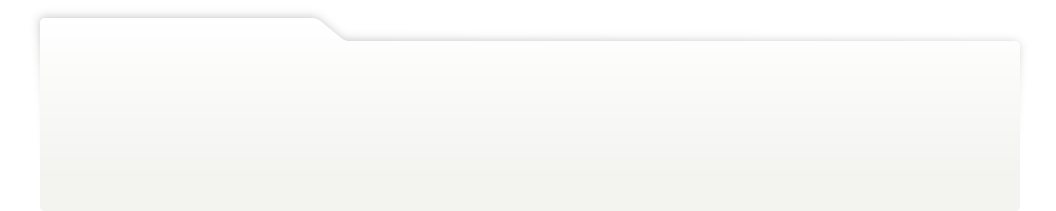
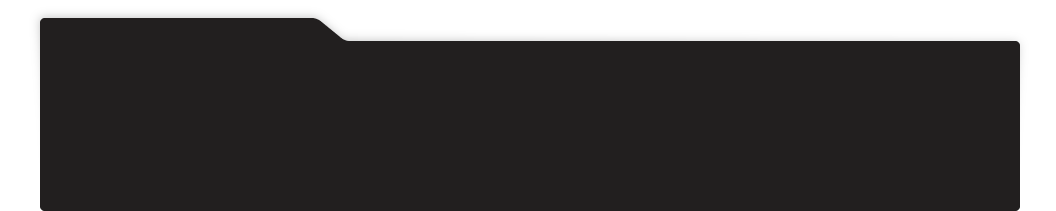
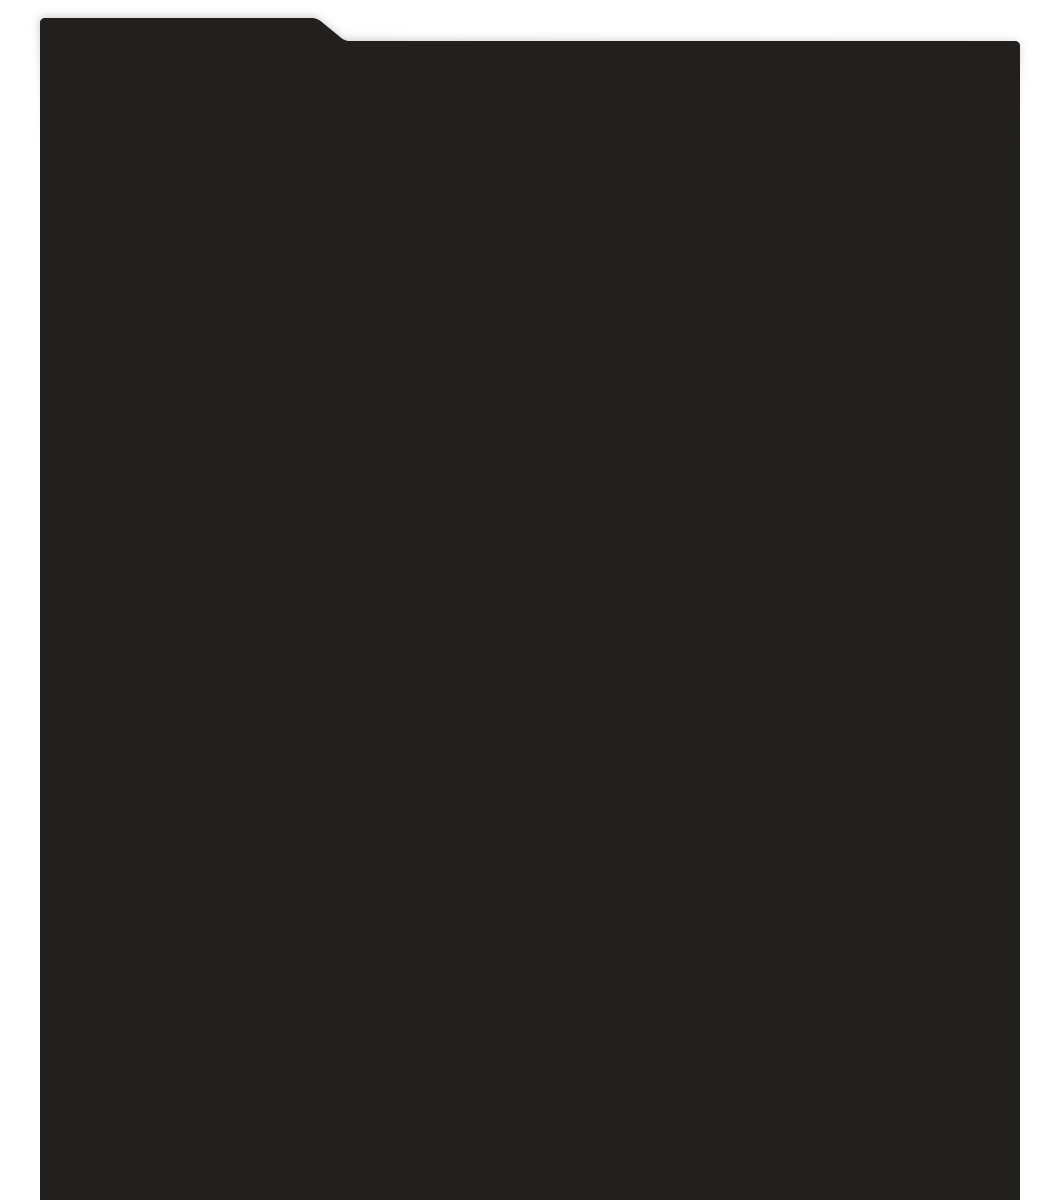
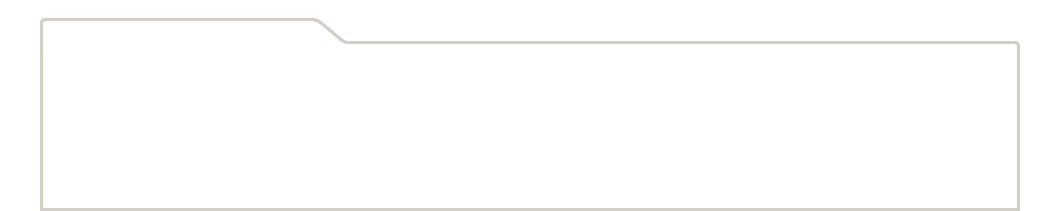
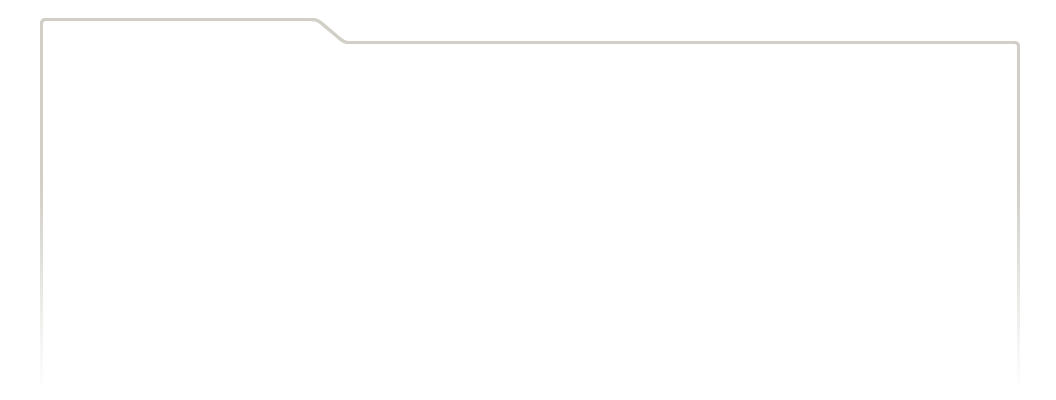
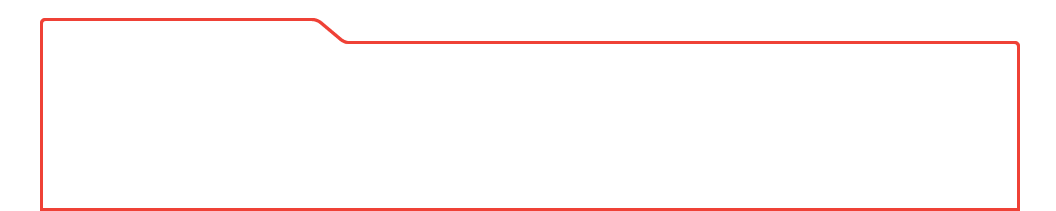
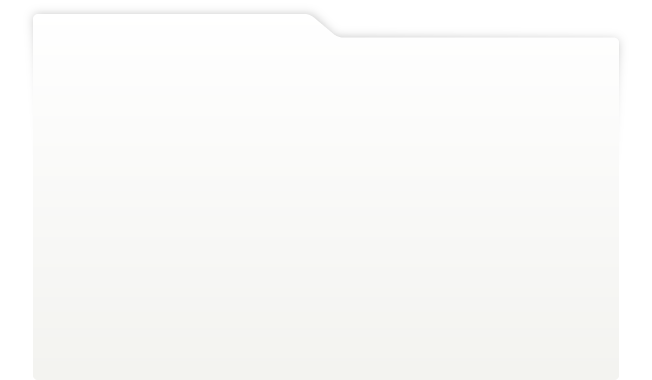
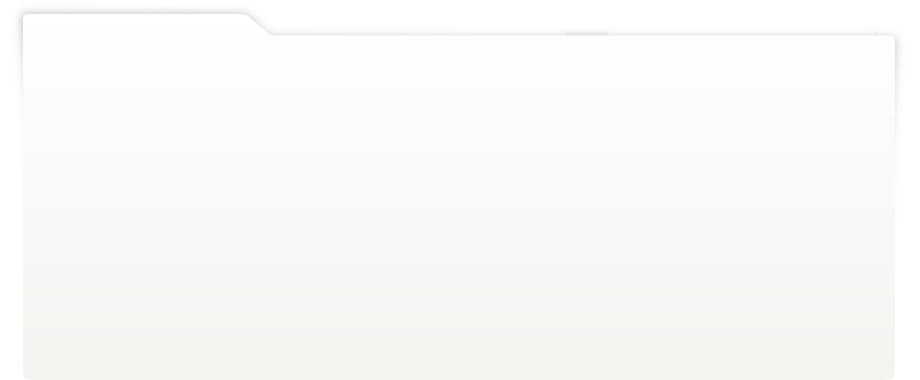
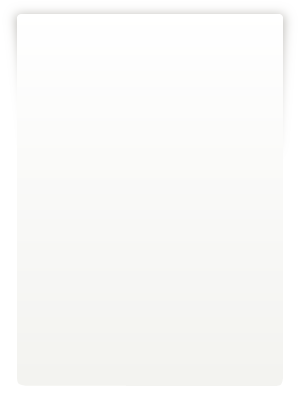
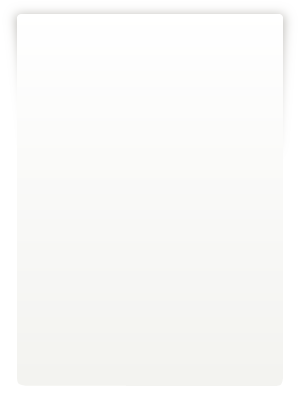
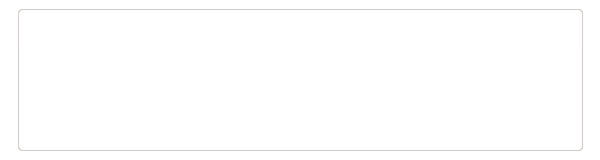
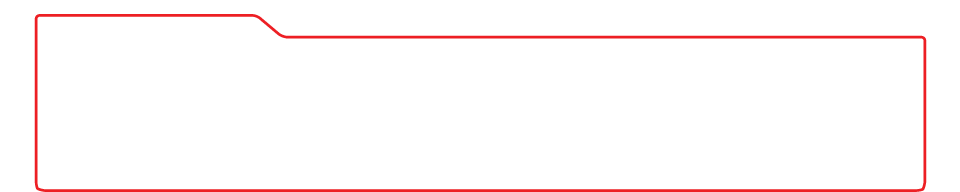
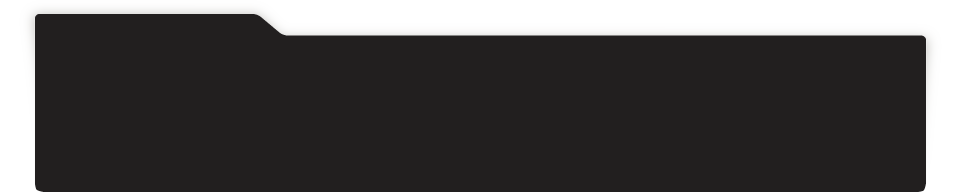
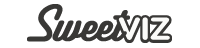
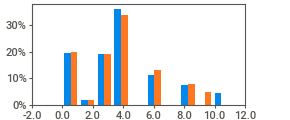
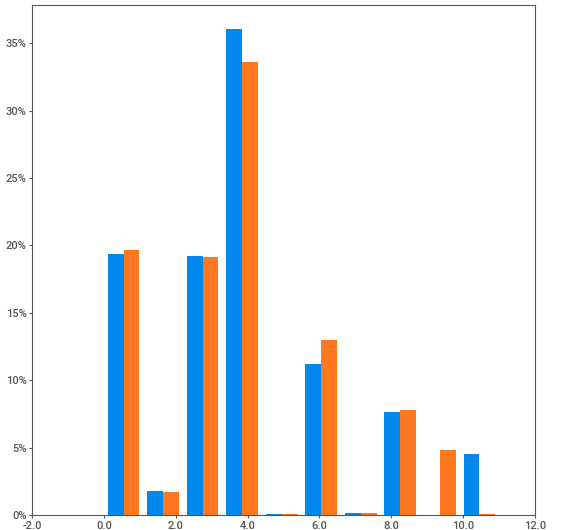
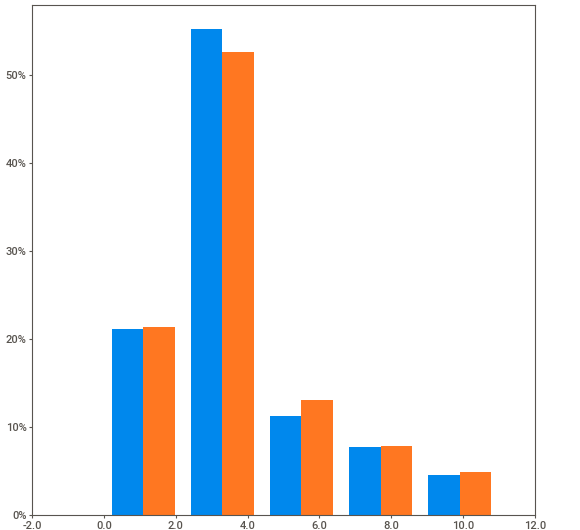
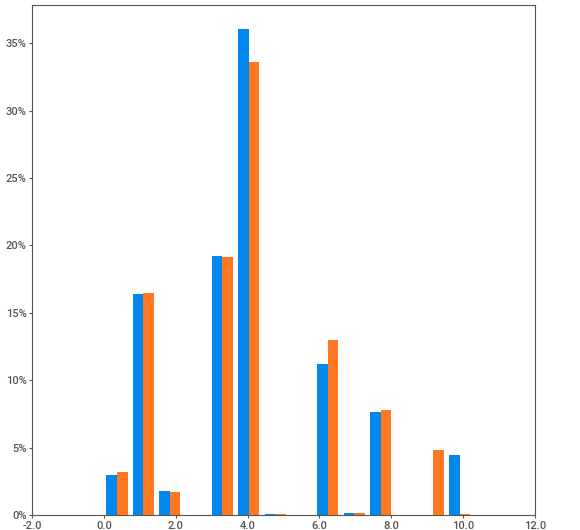
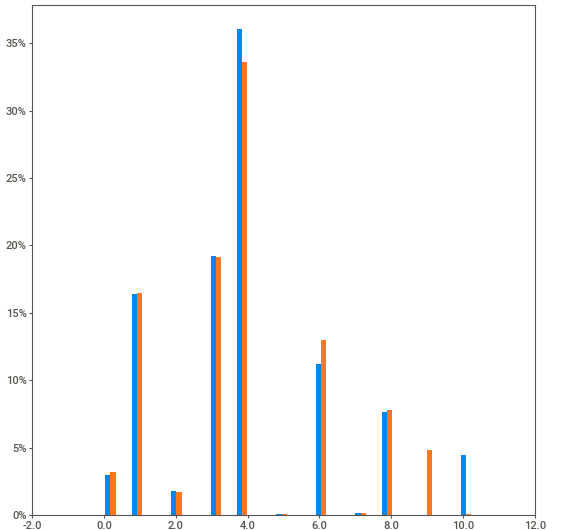
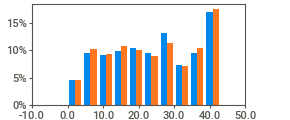
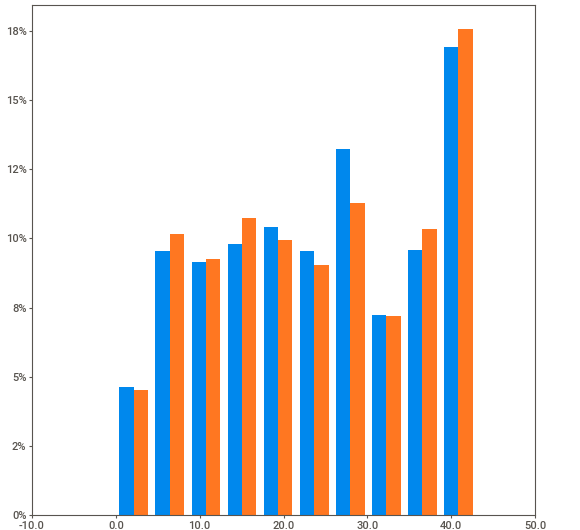
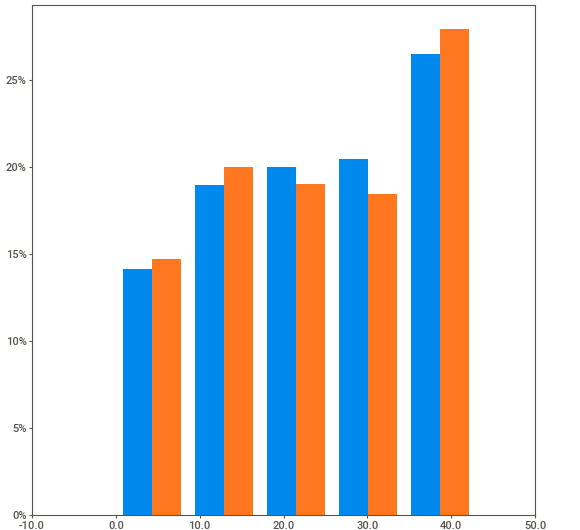
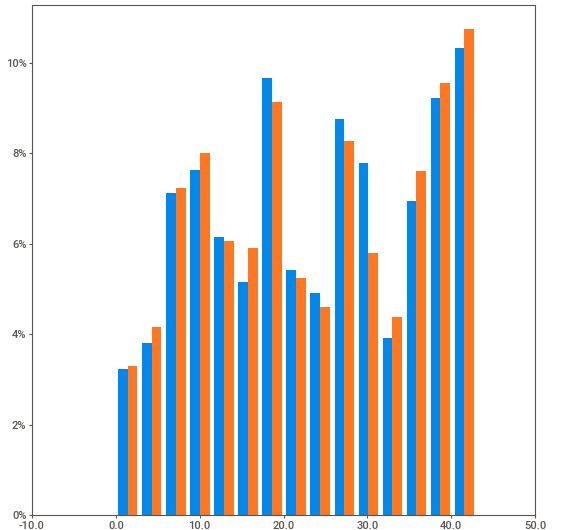
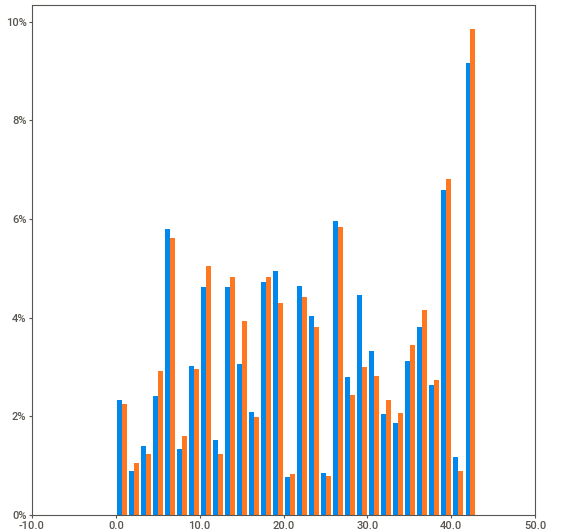
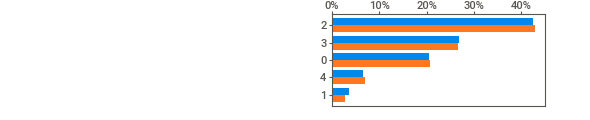
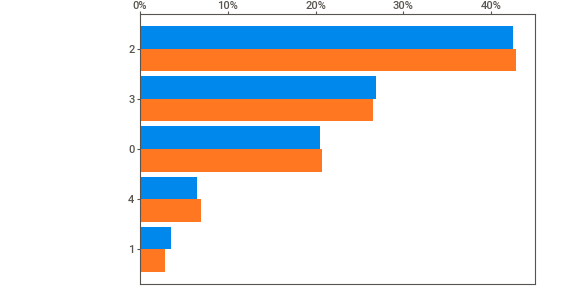
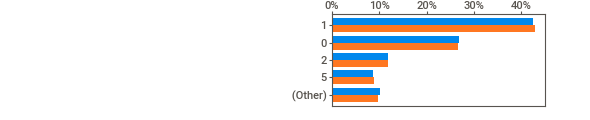
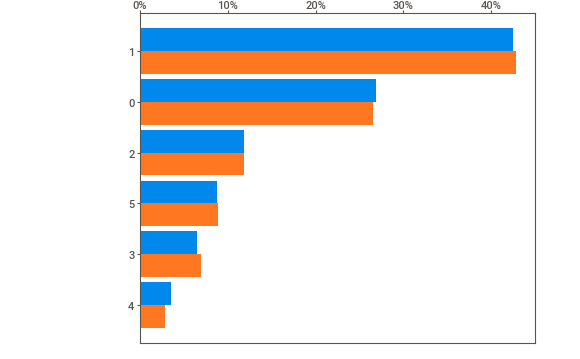
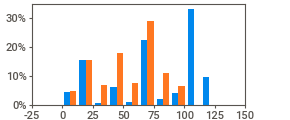
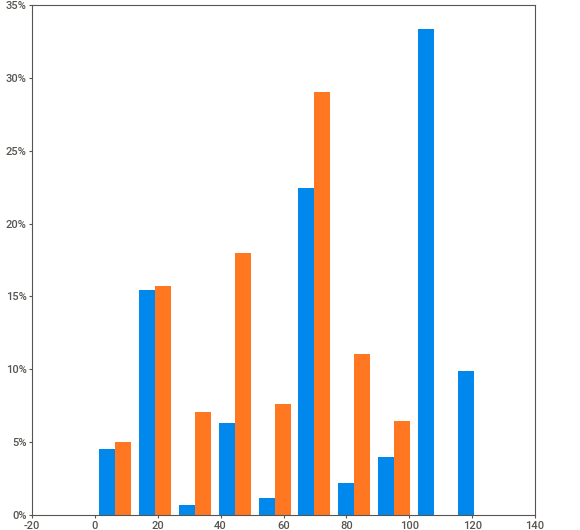
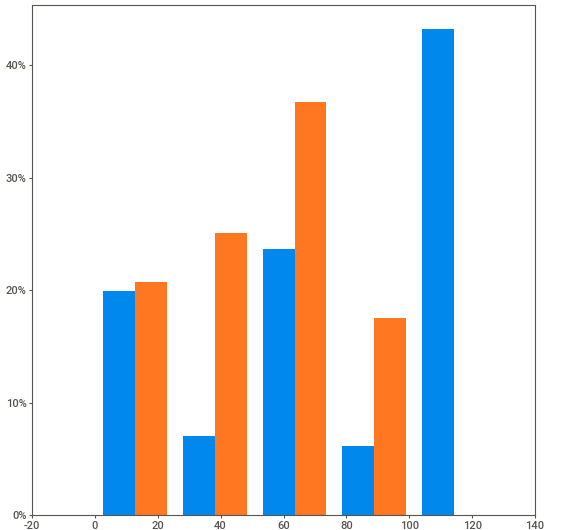
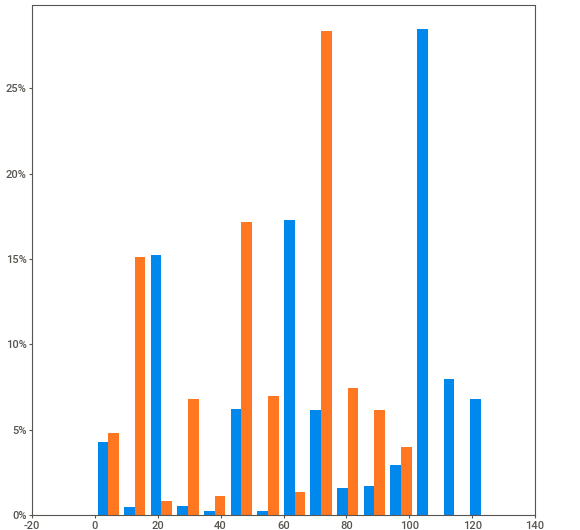
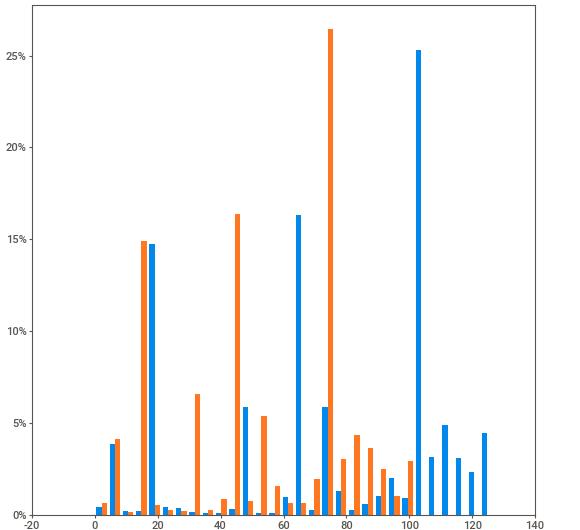
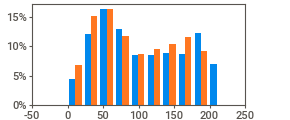
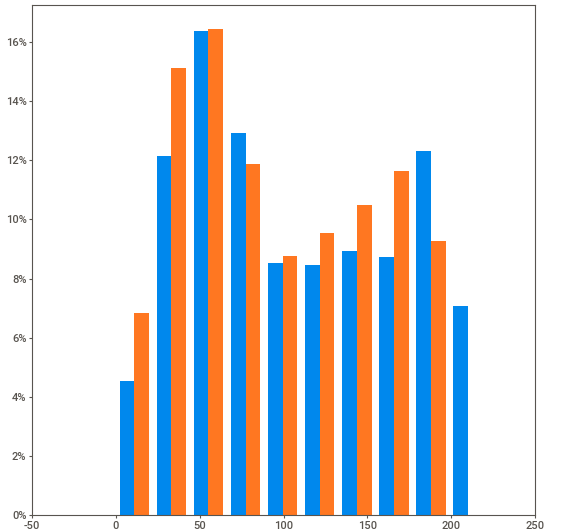
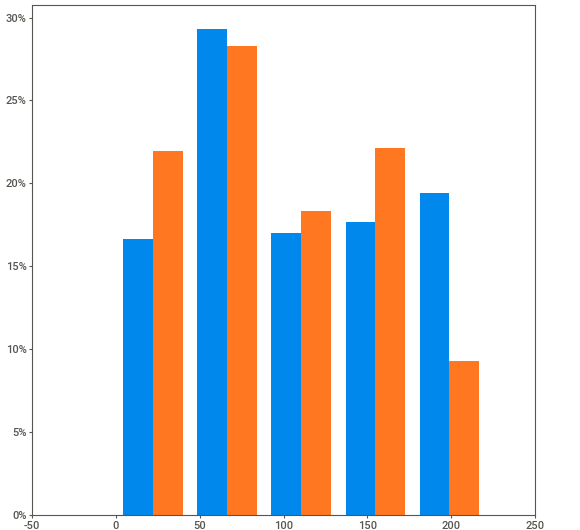
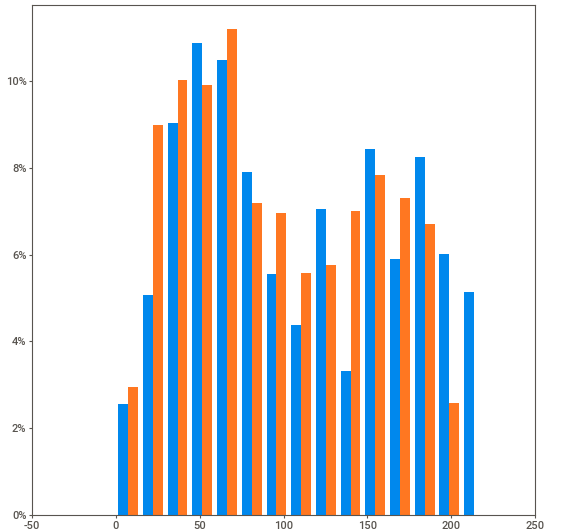
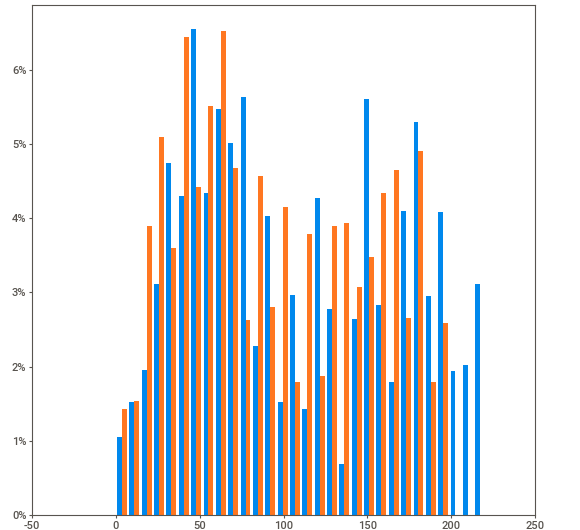
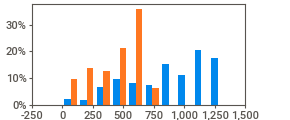
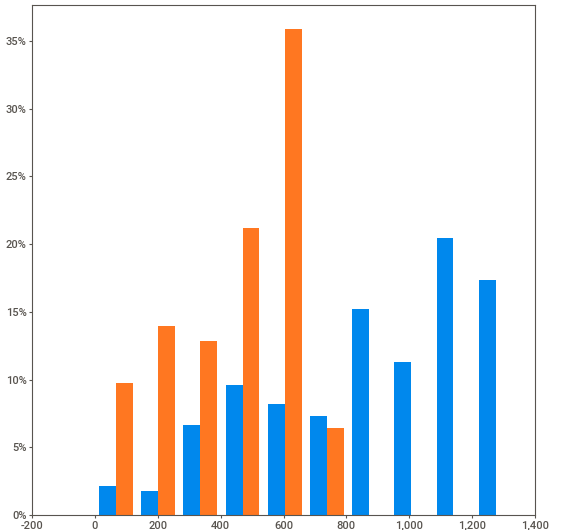
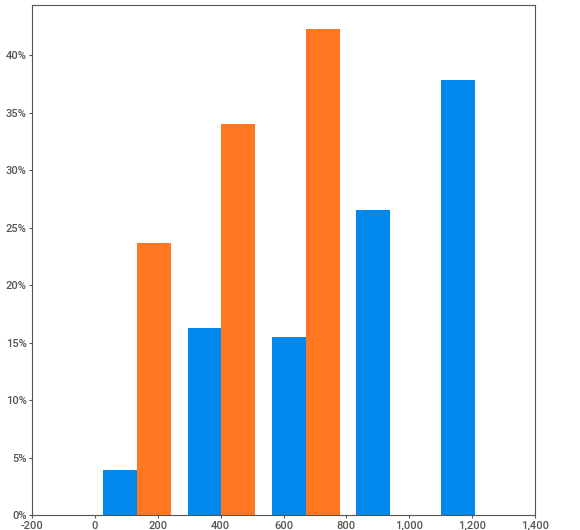
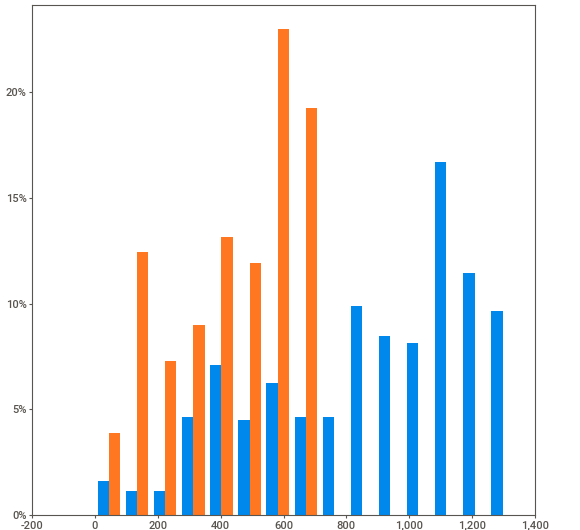
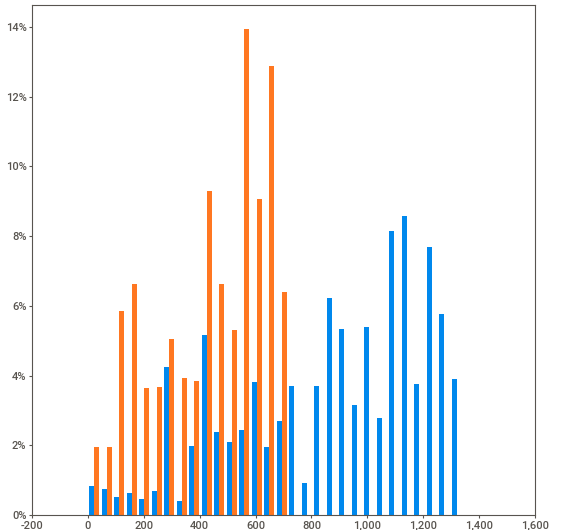
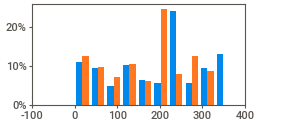
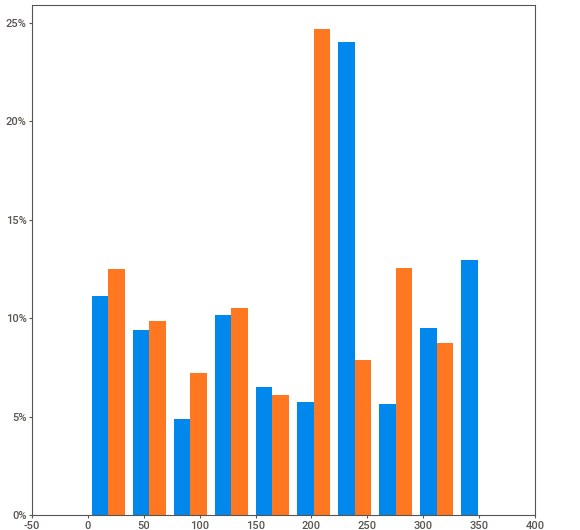
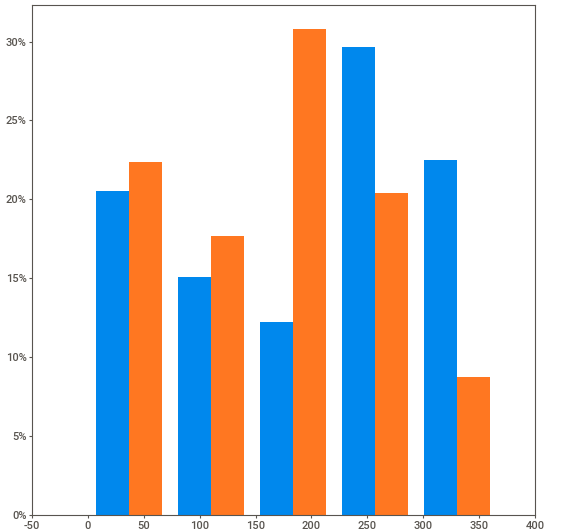
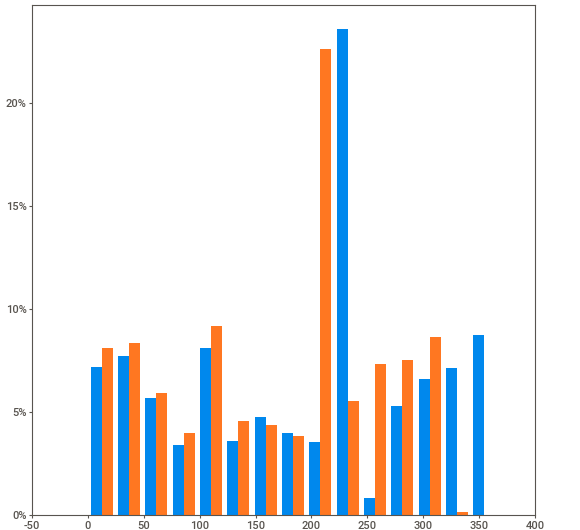
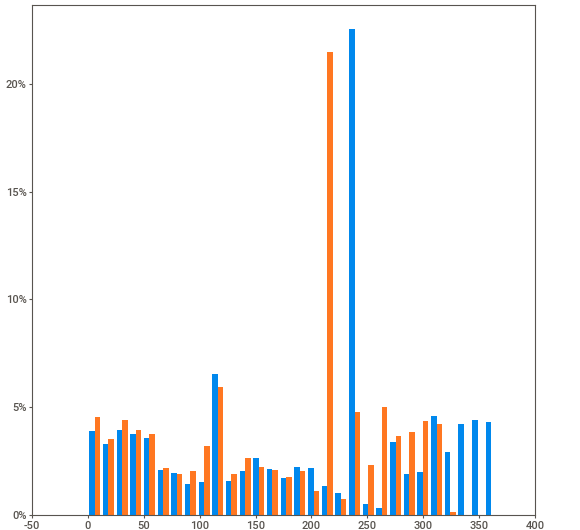
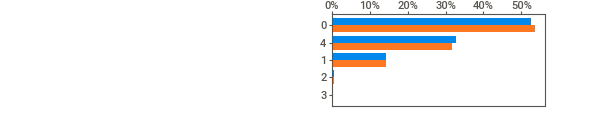
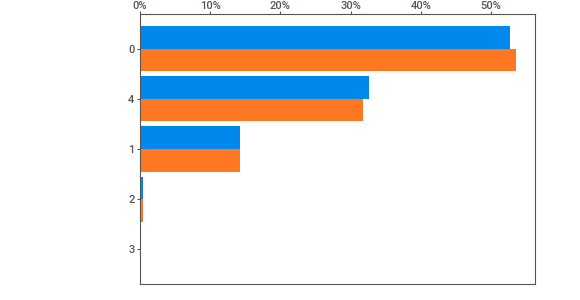
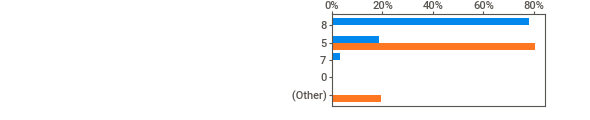
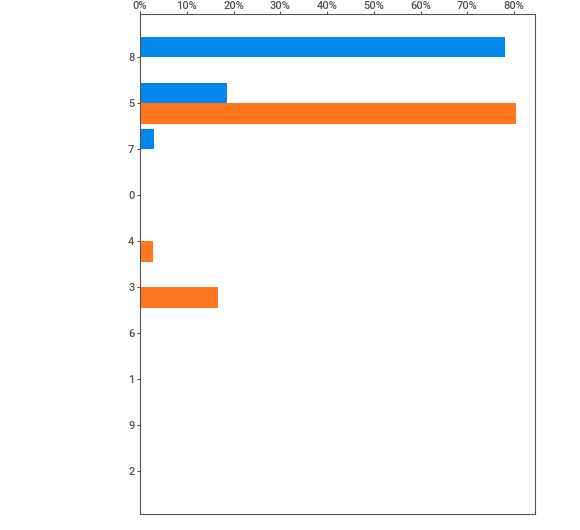
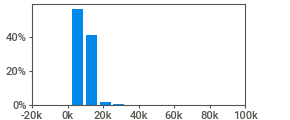
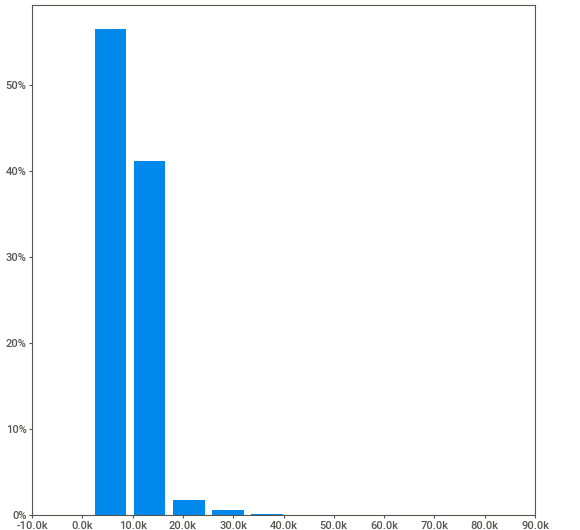
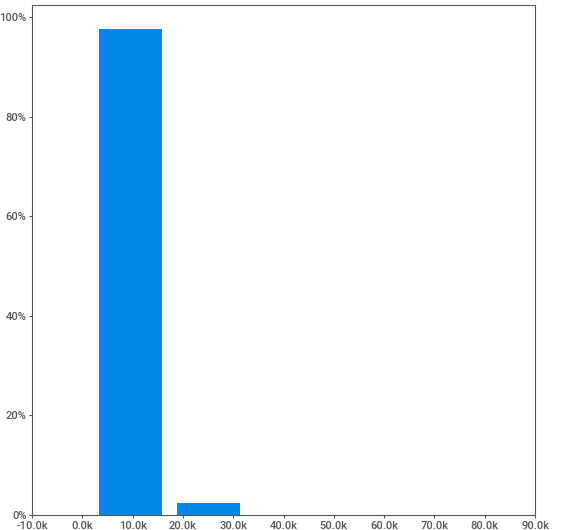
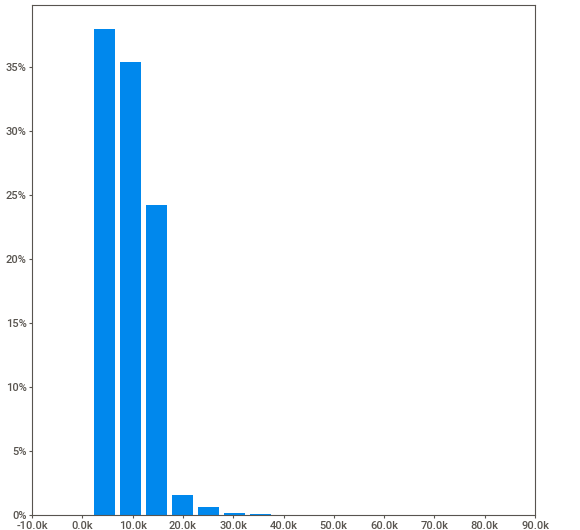
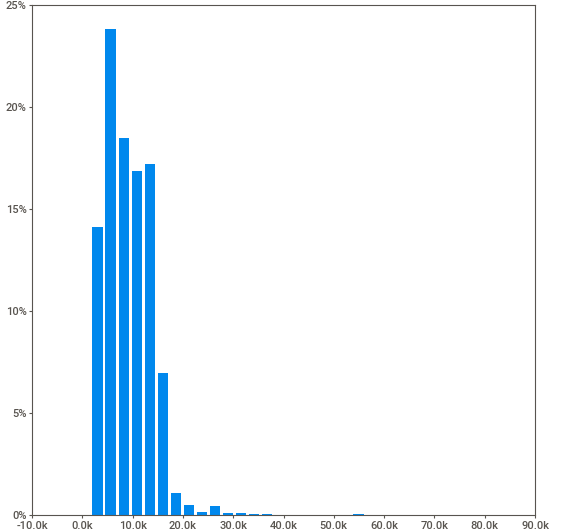
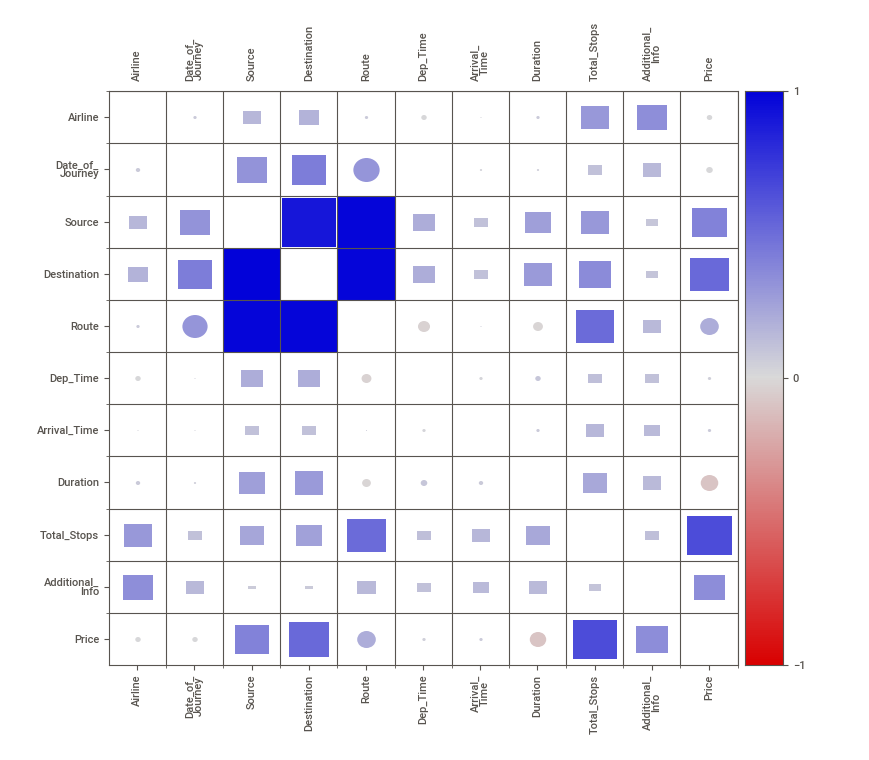
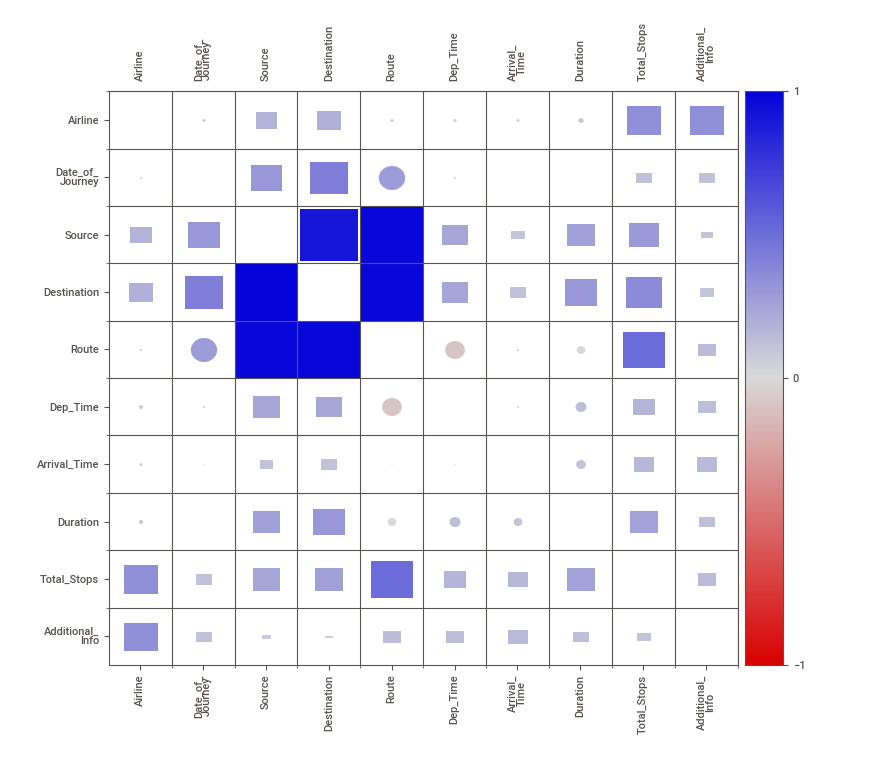

Report 'Train_vs_Test.html' was saved to storage.


In [35]:
# run this line if you want to generate the same report in Notebook itself

my_report1.show_notebook(filepath='Train_vs_Test.html', layout='widescreen', w=900)

## Correlation of the features with the dependent variable "Price"

#### We can see columns "Route", "Duration" and "Total_Stope" have a string correlation with the target variable "Price".

In [37]:
corr_matrix = df_train.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price              1.000000
Route              0.164118
Arrival_Time       0.027377
Source             0.015998
Dep_Time           0.002949
Date_of_Journey   -0.036942
Airline           -0.039520
Additional_Info   -0.065478
Destination       -0.071112
Duration          -0.144270
Total_Stops       -0.571174
Name: Price, dtype: float64

## Lets us now examine correlation using a "heatmap" for further clarification


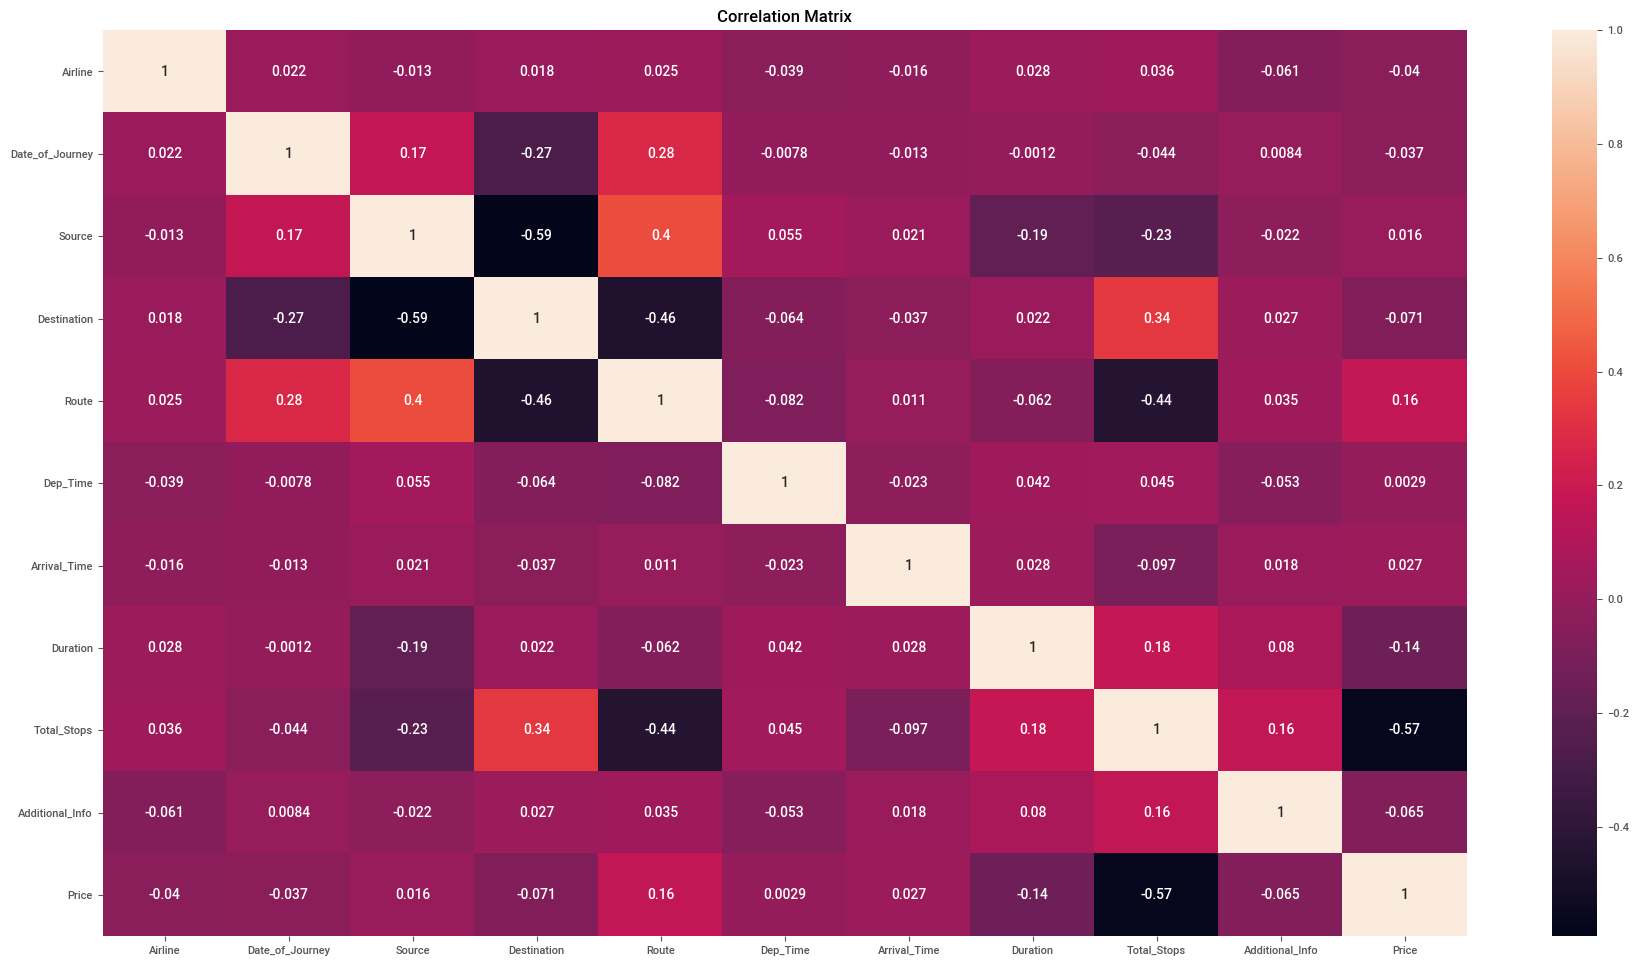

In [38]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

# Splitting up of dataset between x (features) and y (target column)

In [47]:
# train dataset with featurs only
x = df_train.drop(columns = ["Price"], axis=1)

y = df_train["Price"]

# test dataset with featurs only
x1 = df_test

# Lets us now Scale the data for further processing.¶

#### we have used StandardScaler for further scaling up of data 

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled1 = scaler.fit_transform(x1)

# split the dataset into train and test data set

In [48]:

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state = 200)


# Create multi output regression models


#### In this scenario I have used a total of 7 regression algorithms including ensemble algorithms.



### 1) DecisionTreeRegressor

In [49]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

y_pred = dt_reg.predict(x_test)

print("Adjusted R2 squared : ",dt_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9969229413607383
Mean Absolute Error (MAE):  955.9045761830474
Mean Squared Error (MSE):  4936539.015713295
Root Mean Squared Error (RMSE):  2221.8323554474796


### 2) RandomForestRegressor

In [50]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

y_pred = rf_reg.predict(x_test)

print("Adjusted R2 squared : ",rf_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9796277777937943
Mean Absolute Error (MAE):  825.5880438600401
Mean Squared Error (MSE):  2738134.4342222167
Root Mean Squared Error (RMSE):  1654.7309250214116


### 3) ExtraTreesRegressor

In [51]:
from sklearn.ensemble import ExtraTreesRegressor

extra_reg = ExtraTreesRegressor()
extra_reg.fit(x_train,y_train)

y_pred = extra_reg.predict(x_test)

print("Adjusted R2 squared : ",extra_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9969228479376459
Mean Absolute Error (MAE):  875.0927173686947
Mean Squared Error (MSE):  2900763.1621709317
Root Mean Squared Error (RMSE):  1703.1626939816795


### 4) KNeighborsRegressor

In [55]:
from sklearn.neighbors import KNeighborsRegressor

k_neigh = KNeighborsRegressor()
k_neigh.fit(x_train,y_train)

y_pred = k_neigh.predict(x_test)

print("Adjusted R2 squared : ",k_neigh.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.7948276200070794
Mean Absolute Error (MAE):  1454.8957878315132
Mean Squared Error (MSE):  5807878.834783153
Root Mean Squared Error (RMSE):  2409.954114663421


### 5) HistGradientBoostingRegressor

In [53]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hist_grad = HistGradientBoostingRegressor()
hist_grad.fit(x_train,y_train)

y_pred = hist_grad.predict(x_test)

print("Adjusted R2 squared : ",hist_grad.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9037890045574254
Mean Absolute Error (MAE):  973.0590527662201
Mean Squared Error (MSE):  2934879.8332501436
Root Mean Squared Error (RMSE):  1713.1490983712256


### 6) GradientBoostingRegressor

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

grid_reg = GradientBoostingRegressor()
grid_reg.fit(x_train,y_train)

y_pred = grid_reg.predict(x_test)

print("Adjusted R2 squared : ",grid_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.8334371698202327
Mean Absolute Error (MAE):  1297.2049353299858
Mean Squared Error (MSE):  3959378.27098489
Root Mean Squared Error (RMSE):  1989.818652788462


### 7) ExtraTreeRegressor   ( not ensemble )

In [60]:
from sklearn.tree import ExtraTreeRegressor

ex_tree_reg = ExtraTreeRegressor()
ex_tree_reg.fit(x_train,y_train)

y_pred = ex_tree_reg.predict(x_test)

print("Adjusted R2 squared : ",ex_tree_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9969229413607383
Mean Absolute Error (MAE):  985.2228289131566
Mean Squared Error (MSE):  4218995.9907522965
Root Mean Squared Error (RMSE):  2054.019471853248


# Cross validation to check if its overfitting

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
scr = cross_val_score(dt_reg, x, y, cv=5)
print("Cross Validation score of DecisionTreeRegressor model is:", scr.mean())

Cross Validation score of DecisionTreeRegressor model is: 0.774591213508503


In [63]:
scr = cross_val_score(rf_reg, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

Cross Validation score of RandomForestRegressor model is: 0.8638694900742602


In [64]:
scr = cross_val_score(extra_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesRegressor model is:", scr.mean())

Cross Validation score of ExtraTreesRegressor model is: 0.8570177357470683


In [65]:
scr = cross_val_score(k_neigh, x, y, cv=5)
print("Cross Validation score of KNeighborsRegressor model is:", scr.mean())

Cross Validation score of KNeighborsRegressor model is: 0.5819407946217081


In [66]:
scr = cross_val_score(hist_grad, x, y, cv=5)
print("Cross Validation score of HistGradientBoostingRegressor model is:", scr.mean())

Cross Validation score of HistGradientBoostingRegressor model is: 0.8597334027793255


In [67]:
scr = cross_val_score(grid_reg, x, y, cv=5)
print("Cross Validation score of GradientBoostingRegressor model is:", scr.mean())

Cross Validation score of GradientBoostingRegressor model is: 0.8052951382770066


In [68]:
scr = cross_val_score(ex_tree_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreeRegressor model is:", scr.mean())

Cross Validation score of ExtraTreeRegressor model is: 0.7302223662238511


# Selecting the best ML model for this dataset

#### From the below, it appears GradientBoostingRegressor is the appropriate algorithm for this scenario.

#### The difference between the adjusted R2 score and cross validation is much less for this algorithm compared to other 6 algorithms used.


| Sr.No | Models used | Adjusted R2 score | CV score| Difference output |
| --- | --- | --- | --- |---|
| 1 | DecisionTreeRegressor | 0.996922941360738 | 0.774591213508503 | 0.222331727852235 |
| 2 | RandomForestRegressor | 0.979627777793794 | 0.86386949007426 | 0.115758287719534 |
| 3 | ExtraTreesRegressor | 0.996922847937645 | 0.857017735747068 | 0.139905112190577 |
| 4 | KNeighborsRegressor | 0.794827620007079 | 0.581940794621708 | 0.212886825385371 |
| 5 | HistGradientBoostingRegressor | 0.903789004557425 | 0.859733402779325 | 0.0440556017781 |
| 6 | GradientBoostingRegressor | 0.833437169820232 | 0.805295138277006 | 0.0281420315432259 |
| 7 | ExtraTreeRegressor | 0.996922941360738 | 0.730222366223851 | 0.266700575136887 |

# Hyper Parameter Tuning
### Let us try to tune the proposed model (GradientBoostingRegressor) to improve the outcome
#### The "paramaters" have been selected from the skicit library and I have considered 6 paramaters


In [69]:
parameters = {"loss":["ls", "lad", "huber", "quantile"],
              "criterion":["friedman_mse", "mse", "mae"],
              "max_features":["auto", "sqrt", "log2"],
              "n_estimators":[50, 70, 90, 100, 130, 150],
              "random_state":[50, 70, 90, 100, 130, 150],
              "tol":[1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
              }

### RandomizedSearchCV is used to tune the parameters by fitting the same to the training dataset

In [70]:
from sklearn.model_selection import RandomizedSearchCV
RCV = RandomizedSearchCV(GradientBoostingRegressor(), parameters, cv=5, n_iter=10)

In [71]:
RCV.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [50, 70, 90, 100, 130,
                                                         150],
                                        'random_state': [50, 70, 90, 100, 130,
                                                         150],
                                        'tol': [0.1, 0.01, 0.001, 0.0001,
                                                1e-05]})

In [73]:
RCV.best_params_

{'tol': 0.0001,
 'random_state': 50,
 'n_estimators': 150,
 'max_features': 'log2',
 'loss': 'huber',
 'criterion': 'friedman_mse'}

### Rebuild the model using the appropriate params we recieved from best_params_

In [74]:
mod_grid_reg = GradientBoostingRegressor(learning_rate= 0.0001, random_state= 50, n_estimators= 150, max_features= "log2",
                                         loss= "huber", criterion= "friedman_mse")

mod_grid_reg.fit(x_train,y_train)
pred = mod_grid_reg.predict(x_test)
pred

array([8485.03020157, 8426.04184585, 8492.00030616, ..., 8476.19064127,
       8490.12282083, 8472.65078396])

# Saving the model (using joblib)

In [77]:
import joblib
joblib.dump(mod_grid_reg,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']

# Loading the saved model

In [79]:
model = joblib.load("Flight_Price_Prediction.pkl")

### Making prediction using the "Test Datset" as shown below

In [93]:
# df_test is the traning dataset, a different csv 

prediction = model.predict(df_test)

prediction=pd.DataFrame(prediction)
prediction

,0
0,8477.681936
1,8483.980819
2,8477.681936
3,8477.681936
4,8418.507734
...,...
2666,8486.025325
2667,8427.601182
2668,8477.681936
2669,8477.294741
